In [16]:
"""
Final pipeline: closing_cash_balance target + expanded no-leakage features.
"""

# 1. LOAD & INSPECT
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

data_path = "saipem_dataset.csv"
df = pd.read_csv(data_path)

print("Shape (rows, columns):", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nData types and non-null counts:")
print(df.info())

print("\nHead (first 5 rows):")
display(df.head())

print("\nRows per project_id:")
print(df["project_id"].value_counts())

# include closing cash and opening cash in the quick summary
key_cols = [
    "revenue_recognized",
    "cogs_expense",
    "cash_inflow",
    "cash_outflow",
    "opening_cash",
    "closing_cash",
    "accounts_receivable",
    "accounts_payable",
    "accrued_expenses",
    "current_liabilities",
    "dsu_days_sales_uncollected",
    "dpo_days_payables_outstanding",
    "ocf_ratio",
    "working_capital_cycle_days",
    "net_cash_flow",
    "net_cash_flow_lag1",
    "rolling_net_7",
    "rolling_cash_outflow_30",
]

existing_key_cols = [c for c in key_cols if c in df.columns]
print("\nSummary stats for key variables:")
display(df[existing_key_cols].describe().T)

Shape (rows, columns): (368, 21)

Columns:
 ['date', 'project_id', 'revenue_recognized', 'cogs_expense', 'cash_inflow', 'cash_outflow', 'accounts_receivable', 'accounts_payable', 'accrued_expenses', 'current_liabilities', 'opening_cash', 'closing_cash', 'net_cash_flow', 'reserve_buffer', 'dsu_days_sales_uncollected', 'dpo_days_payables_outstanding', 'ocf_ratio', 'working_capital_cycle_days', 'net_cash_flow_lag1', 'rolling_net_7', 'rolling_cash_outflow_30']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           368 non-null    object 
 1   project_id                     368 non-null    object 
 2   revenue_recognized             368 non-null    float64
 3   cogs_expense                   368 non-null    float64
 4   cash_inflow                    368 n

date project_id  revenue_recognized  cogs_expense  cash_inflow  \
0  2022-02-28      PJT_A                0.00     289768.57         0.00   
1  2022-05-08      PJT_A                0.00     675756.66         0.00   
2  2022-08-25      PJT_A          1053303.23    1519675.10         0.00   
3  2023-03-23      PJT_A           317962.02     898760.63   1786930.88   
4  2023-04-03      PJT_A           923130.66     192960.19         0.00   

   cash_outflow  accounts_receivable  accounts_payable  accrued_expenses  \
0          0.00                 0.00         289768.57         289768.57   
1     289768.57                 0.00         675756.66         675756.66   
2     675756.66           1053303.23        1519675.10        1519675.10   
3    1519675.10                 0.00         898760.63         898760.63   
4          0.00            923130.66        1091720.82        1091720.82   

   current_liabilities  opening_cash  closing_cash  net_cash_flow  \
0            579537.14    2514901.42    2514901.42           0.00   
1           1351513.32    2514901.42    2225132.85     -289768.57   
2           3039350.20    2225132.85    1549376.19     -675756.66   
3           1797521.26    1549376.19    1816631.97      267255.78   
4           2183441.64    1816631.97    1816631.97           0.00   

   reserve_buffer  dsu_days_sales_uncollected  dpo_days_payables_outstanding  \
0       168042.00                    0.000000                      30.000000   
1       178523.71                    0.000000                      15.000000   
2       150037.78                   10.000000                      10.000000   
3       117541.03                    5.760938                       7.500000   
4       148161.84                    5.168508                       7.507599   

   ocf_ratio  working_capital_cycle_days  net_cash_flow_lag1  rolling_net_7  \
0   0.000000                   30.000000                 NaN       0.000000   
1  -0.300115                   15.000000                0.00 -144884.285000   
2  -0.407869                   20.000000          -289768.57 -321841.743333   
3   0.157954                   13.260938          -675756.66 -174567.362500   
4   0.000000                   12.676107           267255.78 -139653.890000   

   rolling_cash_outflow_30  
0                 0.000000  
1            144884.285000  
2            321841.743333  
3            621300.082500  
4            497040.066000


Rows per project_id:
project_id
PJT_A    178
PJT_C    123
PJT_B     67
Name: count, dtype: int64

Summary stats for key variables:


count          mean           std  \
revenue_recognized             368.0  2.908122e+05  2.832008e+05   
cogs_expense                   368.0  2.979484e+05  2.657384e+05   
cash_inflow                    368.0  3.022746e+05  4.611421e+05   
cash_outflow                   368.0  2.841802e+05  4.084007e+05   
opening_cash                   368.0  2.447136e+06  2.250690e+06   
closing_cash                   368.0  2.467360e+06  2.267271e+06   
accounts_receivable            368.0  1.099141e+06  1.225145e+06   
accounts_payable               368.0  2.687974e+06  2.210916e+06   
accrued_expenses               368.0  2.687974e+06  2.210916e+06   
current_liabilities            368.0  5.375949e+06  4.421831e+06   
dsu_days_sales_uncollected     368.0  4.360558e+00  3.336043e+00   
dpo_days_payables_outstanding  368.0  8.382654e+00  3.918984e+00   
ocf_ratio                      368.0  9.960794e-03  1.628281e-01   
working_capital_cycle_days     368.0  1.274321e+01  6.145539e+00   
net_cash_flow                  368.0  1.809444e+04  4.920349e+05   
net_cash_flow_lag1             365.0  1.840688e+04  4.907979e+05   
rolling_net_7                  368.0  1.822318e+04  1.704102e+05   
rolling_cash_outflow_30        368.0  2.742721e+05  1.529750e+05   

                                        min           25%           50%  \
revenue_recognized             0.000000e+00  0.000000e+00  2.225717e+05   
cogs_expense                   0.000000e+00  8.341882e+04  2.373280e+05   
cash_inflow                    0.000000e+00  0.000000e+00  0.000000e+00   
cash_outflow                   0.000000e+00  0.000000e+00  6.858183e+04   
opening_cash                   0.000000e+00  7.413849e+05  1.636208e+06   
closing_cash                   0.000000e+00  7.636773e+05  1.636208e+06   
accounts_receivable            0.000000e+00  2.148096e+05  6.130631e+05   
accounts_payable               0.000000e+00  6.943752e+05  1.732658e+06   
accrued_expenses               0.000000e+00  6.943752e+05  1.732658e+06   
current_liabilities            0.000000e+00  1.388750e+06  3.465316e+06   
dsu_days_sales_uncollected     0.000000e+00  2.919829e+00  3.601419e+00   
dpo_days_payables_outstanding  0.000000e+00  5.503024e+00  7.689224e+00   
ocf_ratio                     -4.775988e-01 -5.053309e-02  0.000000e+00   
working_capital_cycle_days     5.239518e+00  8.644030e+00  1.175310e+01   
net_cash_flow                 -1.631753e+06 -1.458549e+05  0.000000e+00   
net_cash_flow_lag1            -1.631753e+06 -1.423718e+05  0.000000e+00   
rolling_net_7                 -4.411217e+05 -6.370736e+04  0.000000e+00   
rolling_cash_outflow_30        0.000000e+00  1.413766e+05  2.282182e+05   

                                        75%           max  
revenue_recognized             4.427566e+05  1.053303e+06  
cogs_expense                   4.467440e+05  1.519675e+06  
cash_inflow                    4.632173e+05  2.656007e+06  
cash_outflow                   4.577218e+05  1.943630e+06  
opening_cash                   3.530542e+06  9.660423e+06  
closing_cash                   3.557392e+06  9.660423e+06  
accounts_receivable            1.639314e+06  6.402942e+06  
accounts_payable               4.788651e+06  8.103720e+06  
accrued_expenses               4.788651e+06  8.103720e+06  
current_liabilities            9.577302e+06  1.620744e+07  
dsu_days_sales_uncollected     4.507970e+00  3.000000e+01  
dpo_days_payables_outstanding  1.024508e+01  3.000000e+01  
ocf_ratio                      5.009804e-02  1.173879e+00  
working_capital_cycle_days     1.550516e+01  6.000000e+01  
net_cash_flow                  2.092804e+05  1.918200e+06  
net_cash_flow_lag1             2.081013e+05  1.918200e+06  
rolling_net_7                  8.344944e+04  6.212344e+05  
rolling_cash_outflow_30        4.199539e+05  6.213001e+05

In [17]:
# -------------------------------------------------------------------
# 2. GLOBAL FEATURE ENGINEERING (per project, leakage-safe)
# -------------------------------------------------------------------

# Final feature list (NO LEAKAGE) for the main model
V3_FEATURE_COLS = [
    # Momentum Storico
    "net_cash_flow_lag1",
    "rolling_net_7",
    "rolling_cash_outflow_30",
    # Stato iniziale giornata (known at start)
    "opening_cash",
    "accounts_receivable",
    "accounts_payable",
    "current_liabilities",
    # Accounting efficiency (lagged t-1)
    "ocf_ratio_lag1",
    "dsu_lag1",
    "dpo_lag1",
    "working_capital_cycle_lag1",
    # Calendario
    "day_of_month",
    "day_of_week",
    "is_month_end",
    "days_since_start",
]

# Main target for the base pipeline
TARGET_COL = "closing_cash_balance"


def add_global_features(df_raw: pd.DataFrame) -> pd.DataFrame:
    """
    For each project_id:
      - ensure datetime & sort
      - build calendar features
      - clean + backfill momentum features
      - build honest t-1 lags for accounting ratios
    Then:
      - compute closing_cash_balance = opening_cash + net_cash_flow
    All features are written back into a single df (same indices).
    """
    df_feat = df_raw.copy()
    df_feat["date"] = pd.to_datetime(df_feat["date"], errors="coerce")

    # per-project engineering
    for pid in sorted(df_feat["project_id"].unique()):
        mask = df_feat["project_id"] == pid
        proj = df_feat.loc[mask].sort_values("date").copy()

        # ---- Calendar Features ----
        proj["day_of_month"] = proj["date"].dt.day
        proj["day_of_week"] = proj["date"].dt.dayofweek  # 0=Mon, 6=Sun
        proj["is_month_end"] = proj["date"].dt.is_month_end.astype(int)
        proj["days_since_start"] = (
            proj["date"] - proj["date"].min()
        ).dt.days

        # ---- Momentum features ----
        # If net_cash_flow_lag1 already exists, just fill; else build from net_cash_flow
        if "net_cash_flow_lag1" in proj.columns:
            proj["net_cash_flow_lag1"] = proj["net_cash_flow_lag1"].fillna(method="bfill")
        else:
            proj["net_cash_flow_lag1"] = proj["net_cash_flow"].shift(1).fillna(method="bfill")

        # rolling_net_7: if missing, build from net_cash_flow; then fill NaN with 0
        if "rolling_net_7" not in proj.columns:
            proj["rolling_net_7"] = proj["net_cash_flow"].rolling(window=7, min_periods=1).mean()
        proj["rolling_net_7"] = proj["rolling_net_7"].fillna(0)

        # rolling_cash_outflow_30: if missing, build from cash_outflow; then fill NaN with 0
        if "rolling_cash_outflow_30" not in proj.columns:
            proj["rolling_cash_outflow_30"] = (
                proj["cash_outflow"]
                .rolling(window=30, min_periods=1)
                .mean()
            )
        proj["rolling_cash_outflow_30"] = proj["rolling_cash_outflow_30"].fillna(0)

        # ---- Honest T-1 lags for accounting ratios ----
        proj["ocf_ratio_lag1"] = proj["ocf_ratio"].shift(1)
        proj["dsu_lag1"] = proj["dsu_days_sales_uncollected"].shift(1)
        proj["dpo_lag1"] = proj["dpo_days_payables_outstanding"].shift(1)
        proj["working_capital_cycle_lag1"] = proj["working_capital_cycle_days"].shift(1)

        # write back into df_feat using original indices
        df_feat.loc[proj.index, [
            "day_of_month",
            "day_of_week",
            "is_month_end",
            "days_since_start",
            "net_cash_flow_lag1",
            "rolling_net_7",
            "rolling_cash_outflow_30",
            "ocf_ratio_lag1",
            "dsu_lag1",
            "dpo_lag1",
            "working_capital_cycle_lag1",
        ]] = proj[
            [
                "day_of_month",
                "day_of_week",
                "is_month_end",
                "days_since_start",
                "net_cash_flow_lag1",
                "rolling_net_7",
                "rolling_cash_outflow_30",
                "ocf_ratio_lag1",
                "dsu_lag1",
                "dpo_lag1",
                "working_capital_cycle_lag1",
            ]
        ]

    # ---- Target: closing cash balance ----
    #  If you already have 'closing_cash', you can sanity-check it,
    #  but we stick to the definition Opening + Net Flow for modeling.
    df_feat[TARGET_COL] = df_feat["opening_cash"] + df_feat["net_cash_flow"]

    return df_feat


# Apply feature engineering globally
df = add_global_features(df)

print("\nAfter global feature engineering, columns now include:")
print(sorted([c for c in df.columns if c not in ["date", "project_id"]])[:40], "...")
print(f"Total columns: {df.shape[1]}")


After global feature engineering, columns now include:
['accounts_payable', 'accounts_receivable', 'accrued_expenses', 'cash_inflow', 'cash_outflow', 'closing_cash', 'closing_cash_balance', 'cogs_expense', 'current_liabilities', 'day_of_month', 'day_of_week', 'days_since_start', 'dpo_days_payables_outstanding', 'dpo_lag1', 'dsu_days_sales_uncollected', 'dsu_lag1', 'is_month_end', 'net_cash_flow', 'net_cash_flow_lag1', 'ocf_ratio', 'ocf_ratio_lag1', 'opening_cash', 'reserve_buffer', 'revenue_recognized', 'rolling_cash_outflow_30', 'rolling_net_7', 'working_capital_cycle_days', 'working_capital_cycle_lag1'] ...
Total columns: 30


C:\Users\hajar\AppData\Local\Temp\ipykernel_20164\3470562088.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  proj["net_cash_flow_lag1"] = proj["net_cash_flow_lag1"].fillna(method="bfill")
C:\Users\hajar\AppData\Local\Temp\ipykernel_20164\3470562088.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  proj["net_cash_flow_lag1"] = proj["net_cash_flow_lag1"].fillna(method="bfill")
C:\Users\hajar\AppData\Local\Temp\ipykernel_20164\3470562088.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  proj["net_cash_flow_lag1"] = proj["net_cash_flow_lag1"].fillna(method="bfill")


In [18]:
# -------------------------------------------------------------------
# 3. CLEAN PROJECT DATA → (X, y) FOR MODELING
# -------------------------------------------------------------------
def prepare_project_data(df: pd.DataFrame, project_id: str, min_rows: int = 30):
    """
    Returns (X, y, df_proj_clean) for a single project_id using:
      - V3_FEATURE_COLS as predictors (no leakage)
      - TARGET_COL = closing_cash_balance

    Steps:
      1) Filter by project_id and ensure datetime + sort by date
      2) Drop rows with NaNs in any feature or target
      3) Enforce a minimum row count to avoid unstable CV
    """
    # 1) Filter by project_id
    df_proj = df[df["project_id"] == project_id].copy()
    if df_proj.empty:
        print(f"[{project_id}] No data found.")
        return None, None, None

    # 2) Ensure date is datetime and sorted
    if not np.issubdtype(df_proj["date"].dtype, np.datetime64):
        df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")

    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    # 3) Drop rows with NaNs in features or target (mostly early rows due to lags)
    missing_cols = [c for c in V3_FEATURE_COLS + [TARGET_COL] if c not in df_proj.columns]
    if missing_cols:
        raise KeyError(f"Missing required columns for project {project_id}: {missing_cols}")

    df_proj = df_proj.dropna(subset=V3_FEATURE_COLS + [TARGET_COL]).reset_index(drop=True)

    if len(df_proj) < min_rows:
        print(f"[{project_id}] Skipped: only {len(df_proj)} usable rows after dropna.")
        return None, None, None

    # 4) Build X, y
    X = df_proj[V3_FEATURE_COLS].values
    y = df_proj[TARGET_COL].values

    return X, y, df_proj



# Build (X, y) for each project
X_A, y_A, df_A = prepare_project_data(df, "PJT_A")
X_B, y_B, df_B = prepare_project_data(df, "PJT_B")
X_C, y_C, df_C = prepare_project_data(df, "PJT_C")

print("\nUsable rows per project after feature/target dropna:")
print("PJT_A:", 0 if X_A is None else len(X_A))
print("PJT_B:", 0 if X_B is None else len(X_B))
print("PJT_C:", 0 if X_C is None else len(X_C))


Usable rows per project after feature/target dropna:
PJT_A: 177
PJT_B: 66
PJT_C: 122


In [19]:
# =========================================================
# 3. Time-Series Cross-Validation & Base Models
#    Target: closing_cash_balance
# =========================================================

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 1) TIME-SERIES SPLIT — forward-chaining folds
tscv = TimeSeriesSplit(n_splits=5)

# 2) BASE MODELS
base_models_v3 = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# 3) HYPERPARAMETER GRIDS
param_grids_v3 = {
    "Linear Regression": {},   # no hyperparameters
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2],
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [2, 3, 4],
    },
}

# 4) GRIDSEARCH & ROBUST EVALUATION
def evaluate_with_gridsearch(model_name, model, param_grid, X, y, cv_strategy):
    """
    Runs GridSearchCV using TimeSeriesSplit to pick best hyperparameters
    based on R² for closing_cash_balance.

    Then re-evaluates the best estimator over the same CV strategy
    and returns robust mean R² / RMSE / MAE across folds.
    """
    print(f"\n Running GridSearch for: {model_name}")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv_strategy,
        scoring="r2",
        n_jobs=-1,
    )

    # Fit grid search
    grid.fit(X, y)
    best_model = grid.best_estimator_

    # Collect all parameter combos
    cv_results = pd.DataFrame(grid.cv_results_)
    cv_results = cv_results[["params", "mean_test_score", "std_test_score"]]
    cv_results["Base Model"] = model_name

    # Re-evaluate best model on each fold for RMSE & MAE
    r2_scores, rmse_scores, mae_scores = [], [], []

    for train_idx, test_idx in cv_strategy.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        best_model.fit(X_train, y_train)
        preds = best_model.predict(X_test)

        r2_scores.append(r2_score(y_test, preds))
        rmse_scores.append(root_mean_squared_error(y_test, preds))
        mae_scores.append(mean_absolute_error(y_test, preds))

    results_summary = {
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Mean R2": np.mean(r2_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Mean MAE": np.mean(mae_scores),
    }

    return results_summary, cv_results


# --- 3A) Run GridSearch for All Three Models on PJT_A ---

# X_A, y_A already created by prepare_project_data(...)
all_summaries = []
all_grid_results = []

for name, model in base_models_v3.items():
    summary, grid_df = evaluate_with_gridsearch(
        model_name=name,
        model=model,
        param_grid=param_grids_v3[name],
        X=X_A,
        y=y_A,
        cv_strategy=tscv,
    )
    all_summaries.append(summary)
    all_grid_results.append(grid_df)

# Combine all grid results
all_grid_df = pd.concat(all_grid_results, ignore_index=True)

# Sort by mean R² descending and get Top 5 combos
top_5_df = all_grid_df.sort_values(
    by="mean_test_score",
    ascending=False,
).head(5)

# Compact summary
summary_df = pd.DataFrame(all_summaries)

print("\n Summary of Best Model per Algorithm (PJT_A, TimeSeriesSplit)")
display(summary_df)

print("\n Top 5 Configurations Overall (by GridSearch Mean R² on PJT_A)")
display(top_5_df[["Base Model", "params", "mean_test_score", "std_test_score"]])



 Running GridSearch for: Linear Regression

 Running GridSearch for: Random Forest

 Running GridSearch for: Gradient Boosting

 Summary of Best Model per Algorithm (PJT_A, TimeSeriesSplit)


Model  \
0  Linear Regression   
1      Random Forest   
2  Gradient Boosting   

                                                                              Best Params  \
0                                                                                      {}   
1  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}   
2                            {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}   

    Mean R2     Mean RMSE      Mean MAE  
0 -0.915863  1.520530e+06  1.335150e+06  
1  0.053996  1.145500e+06  9.406988e+05  
2 -0.087371  1.194085e+06  1.030350e+06


 Top 5 Configurations Overall (by GridSearch Mean R² on PJT_A)


Base Model  \
25  Random Forest   
13  Random Forest   
4   Random Forest   
1   Random Forest   
26  Random Forest   

                                                                                     params  \
25   {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}   
13     {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}   
4       {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}   
1       {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}   
26  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}   

    mean_test_score  std_test_score  
25         0.053996        0.780000  
13         0.053130        0.774728  
4          0.038377        0.801556  
1          0.013986        0.876320  
26         0.011383        0.908584

In [20]:
# =========================================================
# 4. Voting & Stacking Ensembles on PJT_A
#    (still predicting closing_cash_balance)
# =========================================================

from sklearn.ensemble import VotingRegressor, StackingRegressor

# 1. Extract the TOP-3 configs (by GridSearch mean R² on PJT_A)
top_3_configs = top_5_df.head(3)

best_estimators = []

for idx in range(len(top_3_configs)):
    config = top_3_configs.iloc[idx]
    base_name = config["Base Model"]
    params = config["params"]

    # Instantiate the correct model with tuned params
    if base_name == "Linear Regression":
        model_instance = LinearRegression()
    elif base_name == "Random Forest":
        model_instance = RandomForestRegressor(random_state=42, **params)
    elif base_name == "Gradient Boosting":
        model_instance = GradientBoostingRegressor(random_state=42, **params)
    else:
        continue

    est_name = f"{base_name.replace(' ', '_').lower()}_{idx+1}"
    best_estimators.append((est_name, model_instance))

# 2. Build Voting & Stacking Ensembles
voting_model = VotingRegressor(estimators=best_estimators)

stacking_model = StackingRegressor(
    estimators=best_estimators,
    final_estimator=LinearRegression(),
    passthrough=False,
)

# 3. Generic CV evaluator (works for any regressor)
def evaluate_model_cv(model, X, y, cv):
    r2_scores, rmse_scores, mae_scores = [], [], []

    for tr_idx, ts_idx in cv.split(X):
        Xtr, Xts = X[tr_idx], X[ts_idx]
        ytr, yts = y[tr_idx], y[ts_idx]

        model.fit(Xtr, ytr)
        pred = model.predict(Xts)

        r2_scores.append(r2_score(yts, pred))
        rmse_scores.append(root_mean_squared_error(yts, pred))
        mae_scores.append(mean_absolute_error(yts, pred))

    return {
        "Mean R2": np.mean(r2_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Mean MAE": np.mean(mae_scores),
    }

# 4. Evaluate base best models from summary_df (LR, RF, GB)
comparison = {}

for summary in all_summaries:
    name = summary["Model"]
    comparison[name] = {
        "Mean R2": summary["Mean R2"],
        "Mean RMSE": summary["Mean RMSE"],
        "Mean MAE": summary["Mean MAE"],
    }

# 5. Evaluate ensembles on PJT_A
comparison["Voting Ensemble"] = evaluate_model_cv(voting_model, X_A, y_A, tscv)
comparison["Stacking Ensemble"] = evaluate_model_cv(stacking_model, X_A, y_A, tscv)

# 6. Comparison table
comparison_df_A = pd.DataFrame(comparison).T
comparison_df_A = comparison_df_A.sort_values(by="Mean R2", ascending=False)

print("\n Ensemble Comparison on PJT_A (TimeSeriesSplit)")
display(comparison_df_A)


 Ensemble Comparison on PJT_A (TimeSeriesSplit)


Mean R2     Mean RMSE      Mean MAE
Random Forest      0.053996  1.145500e+06  9.406988e+05
Voting Ensemble    0.050126  1.149500e+06  9.453597e+05
Gradient Boosting -0.087371  1.194085e+06  1.030350e+06
Stacking Ensemble -0.711622  1.389079e+06  1.206701e+06
Linear Regression -0.915863  1.520530e+06  1.335150e+06

In [21]:
# =========================================================
# 5. Cross-Project Model Evaluation & Best Selector
#    (PJT_A, PJT_B, PJT_C; target = closing_cash_balance)
# =========================================================

# 1. Extract tuned RF & GB parameters (from PJT_A best models)
rf_row = summary_df[summary_df["Model"] == "Random Forest"].iloc[0]
gb_row = summary_df[summary_df["Model"] == "Gradient Boosting"].iloc[0]

RF_PARAMS_V3 = rf_row["Best Params"]
GB_PARAMS_V3 = gb_row["Best Params"]

print("RF_PARAMS_V3:", RF_PARAMS_V3)
print("GB_PARAMS_V3:", GB_PARAMS_V3)


def build_base_models_for_project():
    """
    Rebuilds all models fresh for a project.

    Voting & Stacking use the tuned top-3 configs (best_estimators).
    All models predict closing_cash_balance.
    """
    lr = LinearRegression()
    rf = RandomForestRegressor(random_state=42, **RF_PARAMS_V3)
    gb = GradientBoostingRegressor(random_state=42, **GB_PARAMS_V3)

    # rebuild tuned top-3 estimators for ensembles
    ensemble_estimators = []
    for est_name, est in best_estimators:
        est_class = est.__class__
        est_params = est.get_params()
        ensemble_estimators.append((est_name, est_class(**est_params)))

    voter = VotingRegressor(estimators=ensemble_estimators)
    stacker = StackingRegressor(
        estimators=ensemble_estimators,
        final_estimator=LinearRegression(),
        passthrough=False,
    )

    models = {
        "Linear Regression": lr,
        "Random Forest (Tuned)": rf,
        "Gradient Boosting (Tuned)": gb,
        "Voting Ensemble (Top-3)": voter,
        "Stacking Ensemble (Top-3)": stacker,
    }
    return models


# 3. Evaluate each model for each project (A, B, C)
project_ids = df["project_id"].unique()
all_results = []

for pid in project_ids:
    print(f"\n=== Evaluating Project {pid} ===")
    X_proj, y_proj, df_proj_clean = prepare_project_data(df, pid)

    if X_proj is None:
        continue

    models = build_base_models_for_project()

    for model_name, model in models.items():
        metrics = evaluate_model_cv(model, X_proj, y_proj, tscv)

        all_results.append(
            {
                "Project": pid,
                "Model": model_name,
                "Mean R2": metrics["Mean R2"],
                "Mean RMSE": metrics["Mean RMSE"],
                "Mean MAE": metrics["Mean MAE"],
            }
        )

# 4. Performance table
all_projects_df = pd.DataFrame(all_results)
print("\n Project-Level Performance (All Models × All Projects)")
display(all_projects_df)

# R² pivot for easier reading
pivot_r2 = all_projects_df.pivot(index="Model", columns="Project", values="Mean R2")
print("\n Mean R² by Model and Project")
display(pivot_r2)

# 5. Company-wide averages per model
overall_perf = (
    all_projects_df.groupby("Model", as_index=False)
    .agg(
        Mean_R2_Across_Projects=("Mean R2", "mean"),
        Mean_RMSE_Across_Projects=("Mean RMSE", "mean"),
        Mean_MAE_Across_Projects=("Mean MAE", "mean"),
    )
    .sort_values(by="Mean_R2_Across_Projects", ascending=False)
)

print("\n Overall Average Performance per Model (Across Projects)")
display(overall_perf)

# 6. Select overall best model
best_row = overall_perf.iloc[0]
BEST_MODEL_NAME_V3 = best_row["Model"]
BEST_MODEL_R2_V3 = best_row["Mean_R2_Across_Projects"]

print("\n ---")
print(f"Overall Best Model: {BEST_MODEL_NAME_V3}")
print(f"   Mean R² across projects: {BEST_MODEL_R2_V3:.3f}")
print("---")

RF_PARAMS_V3: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
GB_PARAMS_V3: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

=== Evaluating Project PJT_A ===

=== Evaluating Project PJT_B ===

=== Evaluating Project PJT_C ===

 Project-Level Performance (All Models × All Projects)


Project                      Model   Mean R2     Mean RMSE      Mean MAE
0    PJT_A          Linear Regression -0.915863  1.520530e+06  1.335150e+06
1    PJT_A      Random Forest (Tuned)  0.053996  1.145500e+06  9.406988e+05
2    PJT_A  Gradient Boosting (Tuned) -0.087371  1.194085e+06  1.030350e+06
3    PJT_A    Voting Ensemble (Top-3)  0.050126  1.149500e+06  9.453597e+05
4    PJT_A  Stacking Ensemble (Top-3) -0.711622  1.389079e+06  1.206701e+06
5    PJT_B          Linear Regression -4.757815  2.248255e+05  2.047399e+05
6    PJT_B      Random Forest (Tuned) -1.987322  1.830740e+05  1.657030e+05
7    PJT_B  Gradient Boosting (Tuned) -2.648297  1.910552e+05  1.701546e+05
8    PJT_B    Voting Ensemble (Top-3) -1.932740  1.829472e+05  1.654762e+05
9    PJT_B  Stacking Ensemble (Top-3) -0.472116  1.494596e+05  1.270858e+05
10   PJT_C          Linear Regression -1.094023  4.169205e+05  3.551943e+05
11   PJT_C      Random Forest (Tuned) -0.142215  3.894697e+05  3.298325e+05
12   PJT_C  Gradient Boosting (Tuned) -0.287490  4.103725e+05  3.538301e+05
13   PJT_C    Voting Ensemble (Top-3) -0.166707  3.911574e+05  3.301285e+05
14   PJT_C  Stacking Ensemble (Top-3) -0.064504  3.776990e+05  3.139183e+05


 Mean R² by Model and Project


Project                       PJT_A     PJT_B     PJT_C
Model                                                  
Gradient Boosting (Tuned) -0.087371 -2.648297 -0.287490
Linear Regression         -0.915863 -4.757815 -1.094023
Random Forest (Tuned)      0.053996 -1.987322 -0.142215
Stacking Ensemble (Top-3) -0.711622 -0.472116 -0.064504
Voting Ensemble (Top-3)    0.050126 -1.932740 -0.166707


 Overall Average Performance per Model (Across Projects)


Model  Mean_R2_Across_Projects  \
3  Stacking Ensemble (Top-3)                -0.416080   
4    Voting Ensemble (Top-3)                -0.683107   
2      Random Forest (Tuned)                -0.691847   
0  Gradient Boosting (Tuned)                -1.007720   
1          Linear Regression                -2.255900   

   Mean_RMSE_Across_Projects  Mean_MAE_Across_Projects  
3              638745.723537             549234.923226  
4              574534.933860             480321.465235  
2              572681.279705             478744.772309  
0              598504.121616             518111.474038  
1              720758.564803             631694.856024


 ---
Overall Best Model: Stacking Ensemble (Top-3)
   Mean R² across projects: -0.416
---


In [22]:
# =========================================================
# 6. Multi-Horizon Net Cash-Flow Forecasting (1, 7, 30 Days)
#    -> Target = future rolling sums of net_cash_flow
#    -> Model type = BEST_MODEL_NAME_V3 (from step 5)
# =========================================================

from sklearn.ensemble import VotingRegressor, StackingRegressor

# 1. Best-model factory (creates a fresh instance each time)
def create_best_model_instance(model_name):
    """
    Returns a fresh, unfitted instance of the model type
    selected in step 5 (BEST_MODEL_NAME_V3), using the
    tuned hyperparameters for RF / GB and the tuned top-3
    configs for Voting / Stacking.
    """
    if model_name == "Voting Ensemble (Top-3)":
        ens_estimators = []
        for est_name, est in best_estimators:
            est_class = est.__class__
            est_params = est.get_params()
            ens_estimators.append((est_name, est_class(**est_params)))
        return VotingRegressor(estimators=ens_estimators)

    elif model_name == "Stacking Ensemble (Top-3)":
        ens_estimators = []
        for est_name, est in best_estimators:
            est_class = est.__class__
            est_params = est.get_params()
            ens_estimators.append((est_name, est_class(**est_params)))
        return StackingRegressor(
            estimators=ens_estimators,
            final_estimator=LinearRegression(),
            passthrough=False,
        )

    elif model_name == "Gradient Boosting (Tuned)":
        return GradientBoostingRegressor(random_state=42, **GB_PARAMS_V3)

    elif model_name == "Random Forest (Tuned)":
        return RandomForestRegressor(random_state=42, **RF_PARAMS_V3)

    elif model_name == "Linear Regression":
        return LinearRegression()

    else:
        raise ValueError(f"Unknown best model type: {model_name}")


# 2. Train model for a given horizon on a single project
def train_horizon_model(df, project_id, base_model, horizon_days):
    """
    For a given project and horizon:

    - Builds a future target as the rolling sum of net_cash_flow
      over the NEXT 'horizon_days' (no leakage).
    - Drops rows where the future window is incomplete.
    - Trains the provided model on (X, y_future).
    - Returns a forecast for the next horizon window and last date used.
    """

    df_proj = df[df["project_id"] == project_id].copy()
    if df_proj.empty:
        print(f"[{project_id}] No data for horizon={horizon_days}")
        return None

    # Ensure datetime & ordering
    df_proj["date"] = pd.to_datetime(df_proj["date"])
    df_proj = df_proj.sort_values("date").reset_index(drop=True)

    # Ensure all global engineered features exist
    # (we already engineered them globally earlier)
    required_cols = V3_FEATURE_COLS + ["net_cash_flow"]
    missing = [c for c in required_cols if c not in df_proj.columns]
    if missing:
        print(f"[{project_id}] Missing required columns: {missing}")
        return None

    # Drop rows missing features or net_cash_flow
    df_proj = df_proj.dropna(subset=required_cols)
    if df_proj.empty:
        print(f"[{project_id}] No valid rows after NA drop for horizon={horizon_days}")
        return None

    # Create future rolling-sum target over NEXT horizon_days
    target_col = f"future_net_cash_flow_{horizon_days}"
    df_proj[target_col] = (
        df_proj["net_cash_flow"]
        .rolling(window=horizon_days, min_periods=1)
        .sum()
        .shift(-horizon_days + 1)
    )

    # Drop rows where future window is incomplete
    df_proj = df_proj.dropna(subset=[target_col])
    if df_proj.empty:
        print(f"[{project_id}] Insufficient data for {horizon_days}-day horizon.")
        return None

    X = df_proj[V3_FEATURE_COLS].values
    y = df_proj[target_col].values

    # Fit on full (X, y) for this horizon
    model = base_model
    model.fit(X, y)

    # Latest feature row -> forecast for the NEXT horizon window
    last_features = df_proj[V3_FEATURE_COLS].iloc[[-1]].values
    forecast_value = model.predict(last_features)[0]
    last_date = df_proj["date"].iloc[-1]

    return {
        "model": model,
        "last_date": last_date,
        "forecast_value": forecast_value,
    }


# 3. Run forecasts for all projects and horizons
horizons = [1, 7, 30]  # 1 day, 7 day, 30 day windows
final_forecasts = []

for pid in project_ids:
    print(f"\n Forecasting for Project {pid} using {BEST_MODEL_NAME_V3}")

    for h in horizons:
        best_model_instance = create_best_model_instance(BEST_MODEL_NAME_V3)
        result = train_horizon_model(df, pid, best_model_instance, horizon_days=h)

        if result is None:
            continue

        final_forecasts.append(
            {
                "Project": pid,
                "Best Model Type": BEST_MODEL_NAME_V3,
                "Horizon_Days": h,
                "Last_Observed_Date": result["last_date"],
                "Forecasted_Future_Net_Cash_Flow": result["forecast_value"],
            }
        )

        print(
            f"  Horizon {h} days: Forecasted net cash flow: "
            f"{result['forecast_value']:,.2f}"
        )

forecast_df = pd.DataFrame(final_forecasts)

print("---")
print("FINAL MULTI-HORIZON NET CASH FLOW FORECASTS (V3)")
print("---")
display(forecast_df)



 Forecasting for Project PJT_A using Stacking Ensemble (Top-3)
  Horizon 1 days: Forecasted net cash flow: -436,013.13
  Horizon 7 days: Forecasted net cash flow: 1,065,180.39
  Horizon 30 days: Forecasted net cash flow: -253,394.42

 Forecasting for Project PJT_B using Stacking Ensemble (Top-3)
  Horizon 1 days: Forecasted net cash flow: 42,890.57
  Horizon 7 days: Forecasted net cash flow: 111,233.04
  Horizon 30 days: Forecasted net cash flow: 832,112.68

 Forecasting for Project PJT_C using Stacking Ensemble (Top-3)
  Horizon 1 days: Forecasted net cash flow: 384,171.53
  Horizon 7 days: Forecasted net cash flow: 192,818.07
  Horizon 30 days: Forecasted net cash flow: 828,940.96
---
FINAL MULTI-HORIZON NET CASH FLOW FORECASTS (V3)
---


Project            Best Model Type  Horizon_Days Last_Observed_Date  \
0   PJT_A  Stacking Ensemble (Top-3)             1         2025-11-27   
1   PJT_A  Stacking Ensemble (Top-3)             7         2025-10-21   
2   PJT_A  Stacking Ensemble (Top-3)            30         2025-08-13   
3   PJT_B  Stacking Ensemble (Top-3)             1         2025-11-08   
4   PJT_B  Stacking Ensemble (Top-3)             7         2024-11-17   
5   PJT_B  Stacking Ensemble (Top-3)            30         2023-10-23   
6   PJT_C  Stacking Ensemble (Top-3)             1         2025-10-28   
7   PJT_C  Stacking Ensemble (Top-3)             7         2025-07-17   
8   PJT_C  Stacking Ensemble (Top-3)            30         2025-02-13   

   Forecasted_Future_Net_Cash_Flow  
0                    -4.360131e+05  
1                     1.065180e+06  
2                    -2.533944e+05  
3                     4.289057e+04  
4                     1.112330e+05  
5                     8.321127e+05  
6                     3.841715e+05  
7                     1.928181e+05  
8                     8.289410e+05

In [23]:
# ======================================================
# GLOBAL FEATURE ENGINEERING -- Build df_feat once
# ======================================================

df_feat = df.copy()
df_feat["date"] = pd.to_datetime(df_feat["date"], errors="coerce")
df_feat = df_feat.sort_values("date").reset_index(drop=True)

# Apply the SAME feature engineering you used earlier in the loop
# but applied globally across all projects

# Calendar
df_feat["day_of_month"] = df_feat["date"].dt.day
df_feat["day_of_week"] = df_feat["date"].dt.dayofweek
df_feat["is_month_end"] = df_feat["date"].dt.is_month_end.astype(int)
df_feat["days_since_start"] = (
    df_feat["date"] - df_feat.groupby("project_id")["date"].transform("min")
).dt.days

# Fill critical lags
df_feat["net_cash_flow_lag1"] = (
    df_feat.groupby("project_id")["net_cash_flow"].shift(1).bfill()
)
df_feat["rolling_net_7"] = (
    df_feat.groupby("project_id")["net_cash_flow"]
    .rolling(7, min_periods=1).mean()
    .reset_index(level=0, drop=True)
)

# Rolling cash outflow
df_feat["rolling_cash_outflow_30"] = (
    df_feat.groupby("project_id")["cash_outflow"]
    .rolling(30, min_periods=1).mean()
    .reset_index(level=0, drop=True)
)

# Lagged accounting features
df_feat["ocf_ratio_lag1"] = df_feat.groupby("project_id")["ocf_ratio"].shift(1)
df_feat["dsu_lag1"] = df_feat.groupby("project_id")["dsu_days_sales_uncollected"].shift(1)
df_feat["dpo_lag1"] = df_feat.groupby("project_id")["dpo_days_payables_outstanding"].shift(1)
df_feat["working_capital_cycle_lag1"] = (
    df_feat.groupby("project_id")["working_capital_cycle_days"].shift(1)
)

# Target (closing cash)
df_feat["closing_cash_balance"] = (
    df_feat["opening_cash"] + df_feat["net_cash_flow"]
)

# Remove all lag-created NA rows
df_feat = df_feat.dropna().reset_index(drop=True)

print("df_feat built successfully — shape:", df_feat.shape)


df_feat built successfully — shape: (365, 30)


In [24]:
project_ids_feat = sorted(df_feat["project_id"].unique())


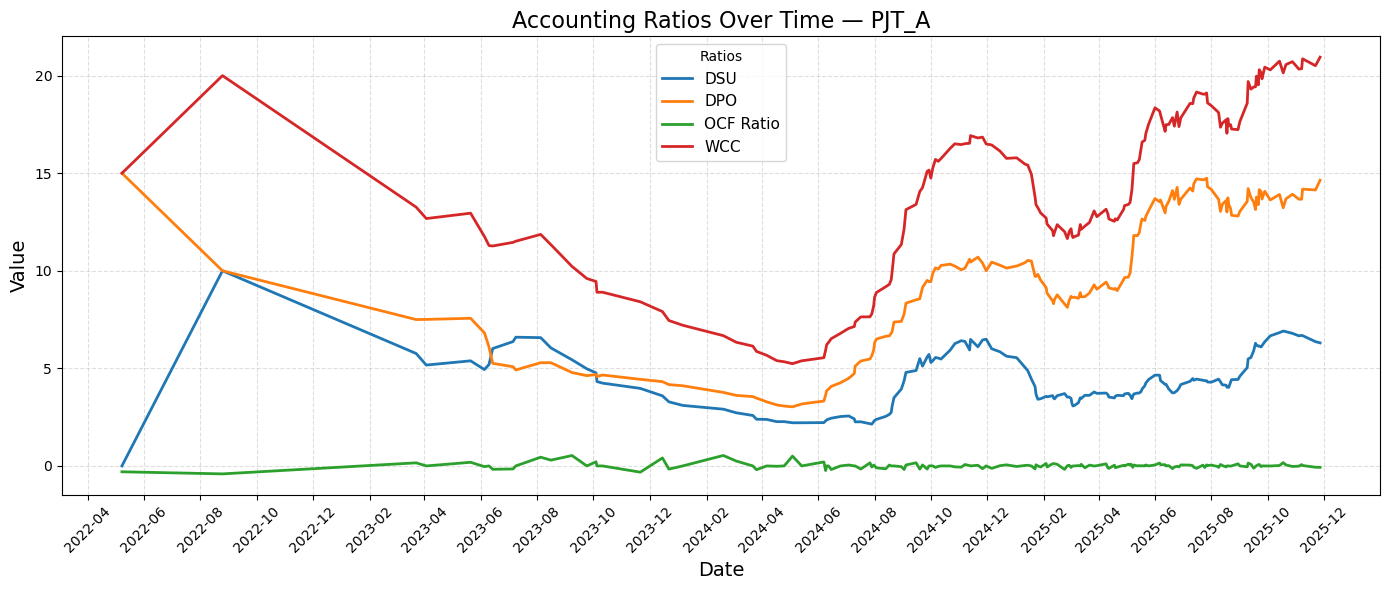

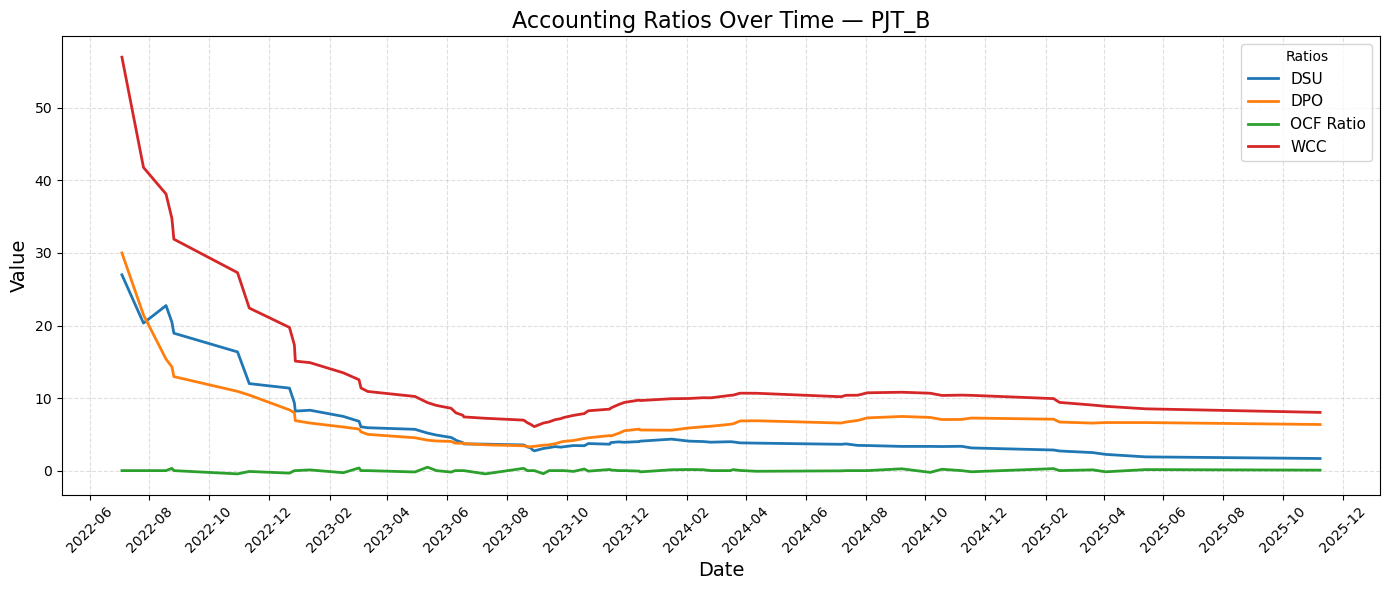

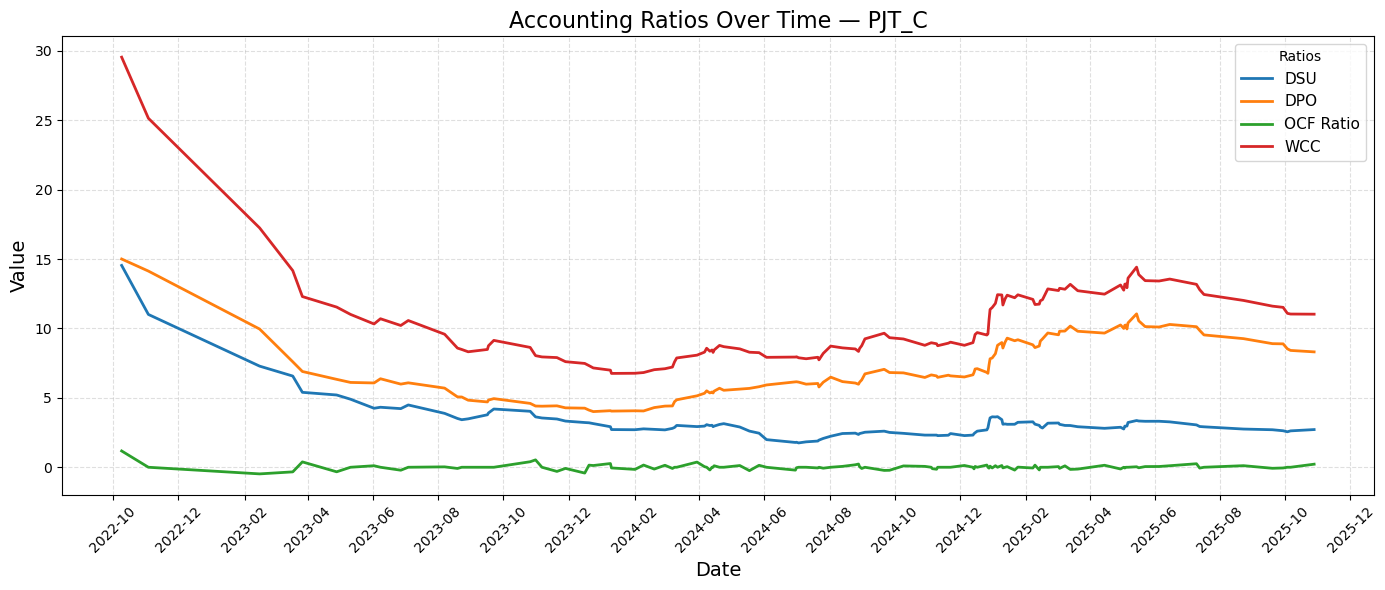

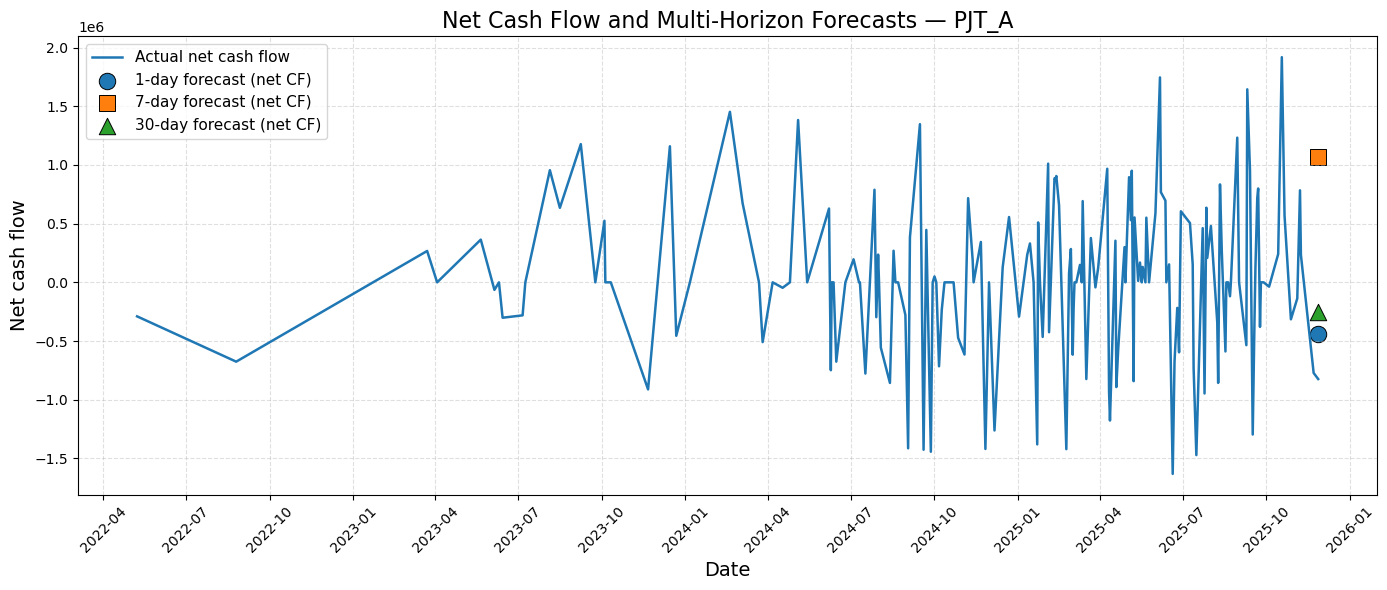

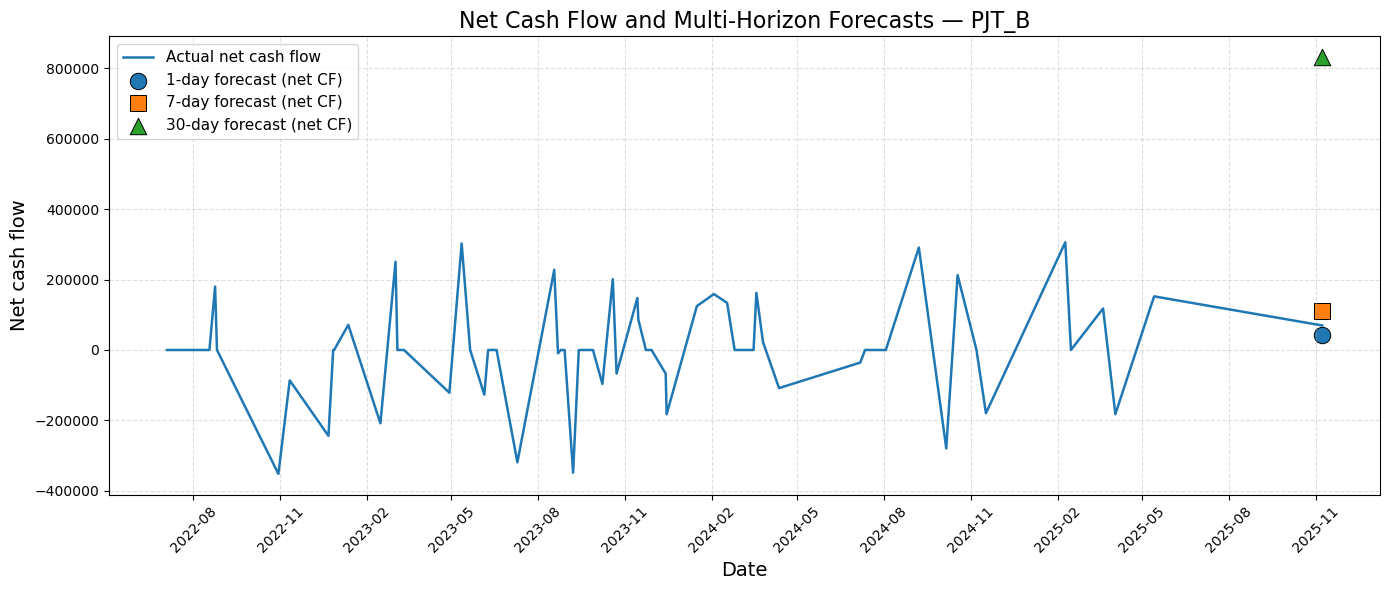

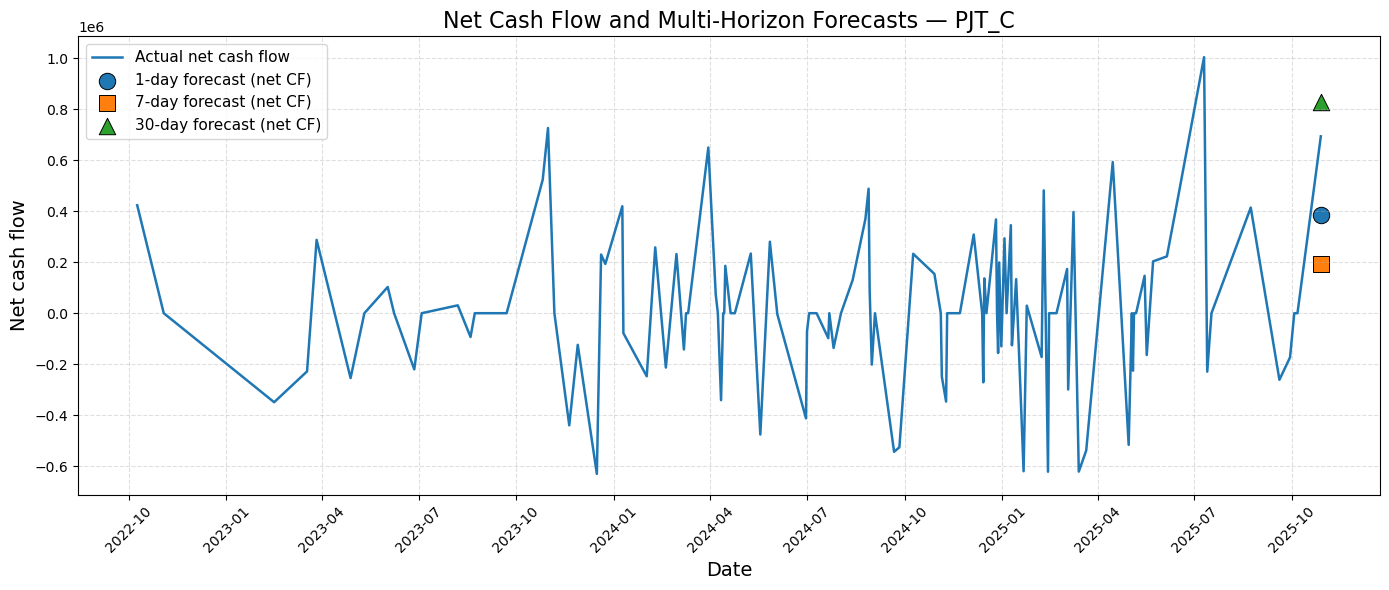

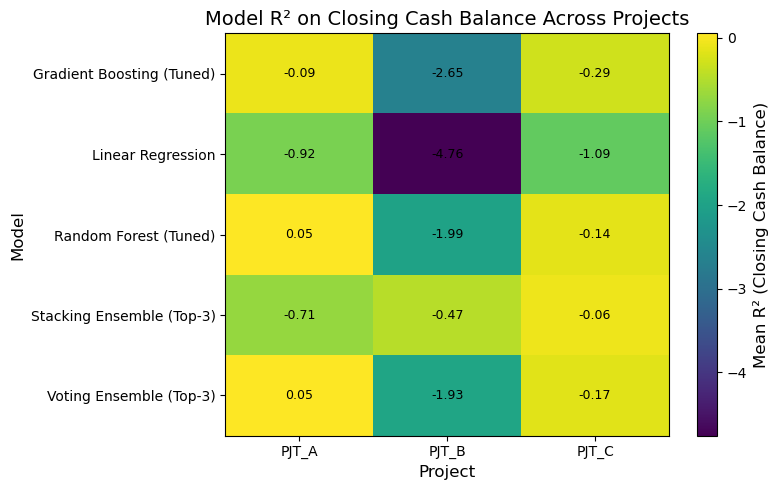

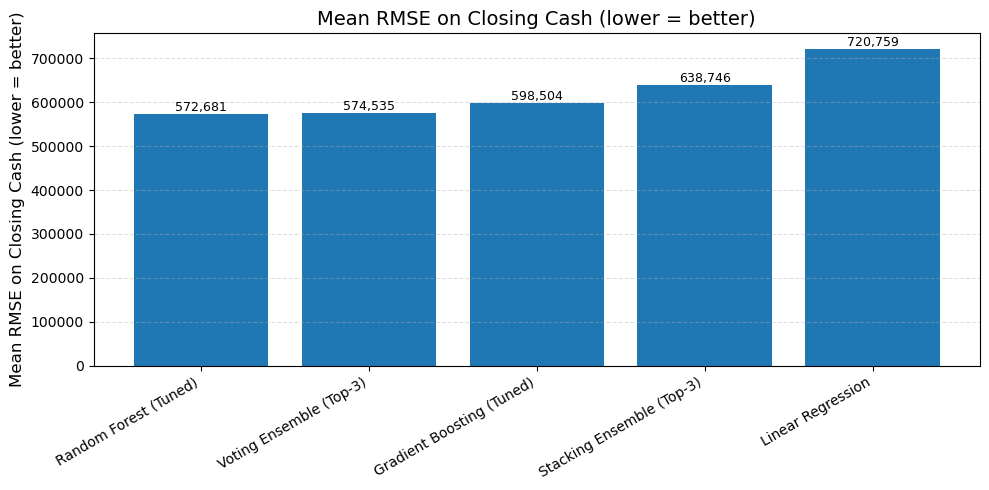

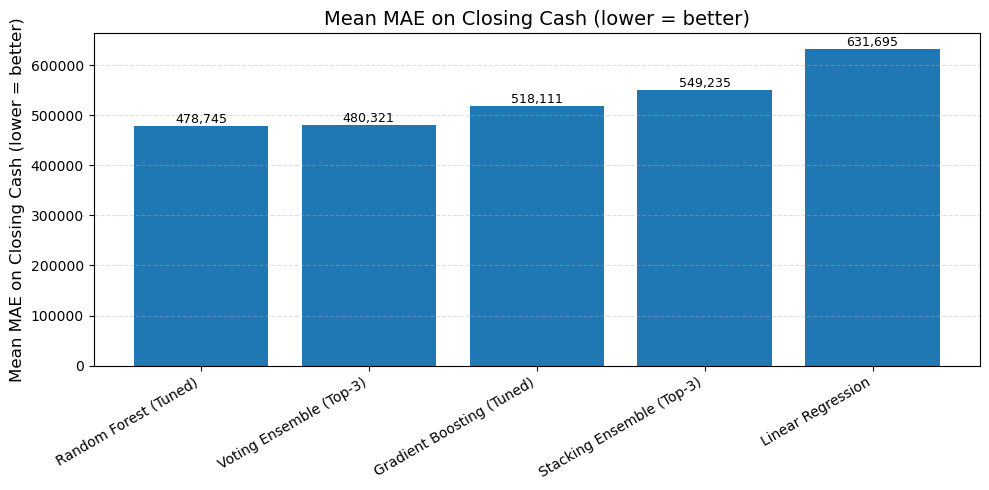

PFI on project: PJT_C, X shape: (122, 15), y length: 122


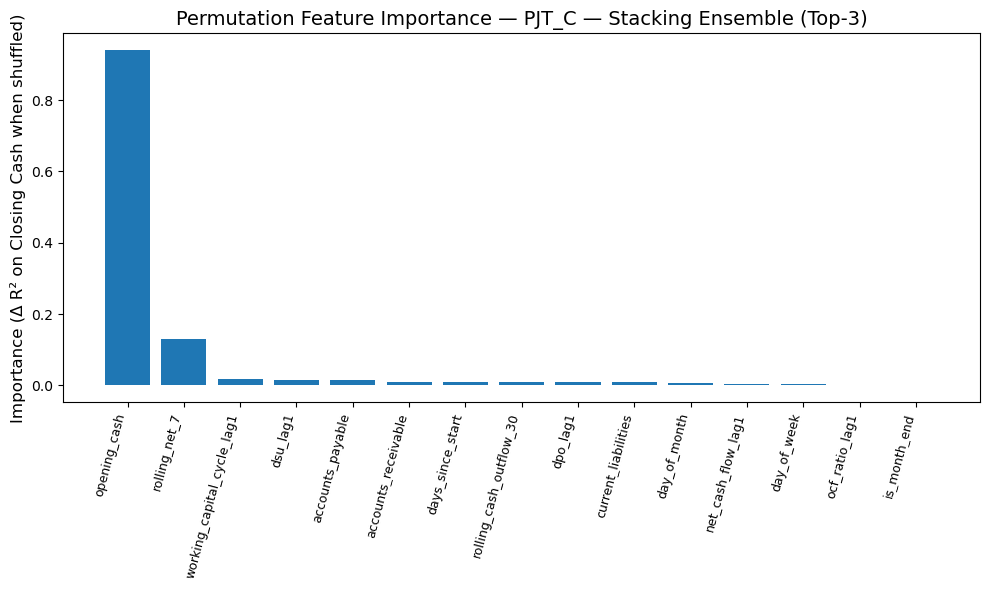

In [25]:
# =========================
# 7. VISUALISATIONS (NEW)
# =========================

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# In case not already defined:
project_ids_feat = sorted(df_feat["project_id"].unique())

# -------------------------------------------------------
# 7a. Accounting Ratio Time-Series Plots (per project)
# -------------------------------------------------------

ratio_map = {
    "dsu_days_sales_uncollected": "DSU",
    "dpo_days_payables_outstanding": "DPO",
    "ocf_ratio": "OCF Ratio",
    "working_capital_cycle_days": "WCC",
}

for pid in project_ids_feat:
    df_proj = df_feat[df_feat["project_id"] == pid].copy()

    df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    plt.figure(figsize=(14, 6))

    for col, label in ratio_map.items():
        plt.plot(df_proj["date"], df_proj[col], label=label, linewidth=2)

    plt.title(f"Accounting Ratios Over Time — {pid}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Value", fontsize=14)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45, fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(title="Ratios", fontsize=11)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7b. Actual Net Cash Flow & Multi-Horizon Forecast Markers
#      (Multi-horizon = future net cash flow, from forecast_df)
# ------------------------------------------------------------------

df_feat["date"] = pd.to_datetime(df_feat["date"], errors="coerce")

for pid in project_ids_feat:
    df_proj = df_feat[df_feat["project_id"] == pid].copy()
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    last_date_for_plot = df_proj["date"].max()
    f_proj = forecast_df[forecast_df["Project"] == pid].copy()

    plt.figure(figsize=(14, 6))

    # Actual net cash flow
    plt.plot(
        df_proj["date"],
        df_proj["net_cash_flow"],
        label="Actual net cash flow",
        linewidth=1.8,
    )

    horizon_settings = [
        (1,  "1-day forecast (net CF)",  "o"),
        (7,  "7-day forecast (net CF)",  "s"),
        (30, "30-day forecast (net CF)", "^"),
    ]

    for h, label, marker in horizon_settings:
        sub = f_proj[f_proj["Horizon_Days"] == h]
        if not sub.empty:
            value = sub["Forecasted_Future_Net_Cash_Flow"].iloc[0]
            plt.scatter(
                last_date_for_plot,
                value,
                marker=marker,
                s=140,
                label=label,
                edgecolor="black",
                linewidth=0.7,
            )

    plt.title(f"Net Cash Flow and Multi-Horizon Forecasts — {pid}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Net cash flow", fontsize=14)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45, fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7c. Model Performance Visuals (New Target = Closing Cash)
# -------------------------------------------------------

# Heatmap of R² across projects (already computed pivot_r2)

plt.figure(figsize=(8, 5))
im = plt.imshow(pivot_r2.values, cmap="viridis", aspect="auto")

cbar = plt.colorbar(im)
cbar.set_label("Mean R² (Closing Cash Balance)", fontsize=12)

plt.xticks(
    ticks=np.arange(len(pivot_r2.columns)),
    labels=pivot_r2.columns,
    fontsize=10
)
plt.yticks(
    ticks=np.arange(len(pivot_r2.index)),
    labels=pivot_r2.index,
    fontsize=10
)

plt.xlabel("Project", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model R² on Closing Cash Balance Across Projects", fontsize=14)

for i in range(pivot_r2.shape[0]):
    for j in range(pivot_r2.shape[1]):
        val = pivot_r2.values[i, j]
        text_color = "white" if val >= 0.6 else "black"
        plt.text(
            j, i,
            f"{val:.2f}",
            ha="center",
            va="center",
            color=text_color,
            fontsize=9
        )

plt.tight_layout()
plt.show()

# Bar charts for RMSE / MAE (already in overall_perf)

metrics = {
    "Mean_RMSE_Across_Projects": "Mean RMSE on Closing Cash (lower = better)",
    "Mean_MAE_Across_Projects": "Mean MAE on Closing Cash (lower = better)",
}

for metric_key, metric_label in metrics.items():
    data_sorted = overall_perf.sort_values(by=metric_key, ascending=True)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(data_sorted["Model"], data_sorted[metric_key])

    plt.title(metric_label, fontsize=14)
    plt.ylabel(metric_label, fontsize=12)
    plt.xticks(rotation=30, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:,.0f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7d. Permutation Feature Importance (PFI) for Closing Cash
# -------------------------------------------------------

from sklearn.inspection import permutation_importance

project_for_pfi = "PJT_C"  # change to PJT_B / PJT_C if desired

# Reuse your prepare_project_data which now targets closing_cash_balance
X_pfi, y_pfi, df_pfi = prepare_project_data(df_feat, project_for_pfi)
print(f"PFI on project: {project_for_pfi}, X shape: {X_pfi.shape}, y length: {len(y_pfi)}")

best_model_pfi = create_best_model_instance(BEST_MODEL_NAME_V3)
best_model_pfi.fit(X_pfi, y_pfi)

pfi_result = permutation_importance(
    best_model_pfi,
    X_pfi,
    y_pfi,
    n_repeats=10,
    random_state=42
)

importances = pfi_result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(
    [V3_FEATURE_COLS[i] for i in indices],
    importances[indices]
)
plt.xticks(rotation=75, ha="right", fontsize=9)
plt.ylabel("Importance (Δ R² on Closing Cash when shuffled)", fontsize=12)
plt.title(
    f"Permutation Feature Importance — {project_for_pfi} — {BEST_MODEL_NAME_V3}",
    fontsize=14
)
plt.tight_layout()
plt.show()

In [26]:
# =============================================
# 8. Scenario Analysis (NEW PIPELINE VERSION)
# =============================================

import pandas as pd
import numpy as np

def train_best_model_for_project(df_feat, project_id):
    """
    Train BEST_MODEL_NAME_V3 on closing_cash_balance
    for a single project, using the global feature pipeline.
    """
    df_proj = df_feat[df_feat["project_id"] == project_id].copy()
    if df_proj.empty:
        print(f"[{project_id}] No data for scenario analysis.")
        return None, None

    df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    # ensure required columns exist
    missing_cols = [c for c in V3_FEATURE_COLS + [TARGET_COL] if c not in df_proj.columns]
    if missing_cols:
        print(f"[{project_id}] Missing columns for scenario analysis: {missing_cols}")
        return None, None

    # drop rows missing features or target
    df_proj = df_proj.dropna(subset=V3_FEATURE_COLS + [TARGET_COL])
    if df_proj.empty:
        print(f"[{project_id}] No valid rows for scenario analysis after NA drop.")
        return None, None

    X = df_proj[V3_FEATURE_COLS].values
    y = df_proj[TARGET_COL].values  # closing_cash_balance

    model = create_best_model_instance(BEST_MODEL_NAME_V3)
    model.fit(X, y)

    last_row = df_proj.iloc[-1]
    return model, last_row


def apply_scenario_to_features(base_features, scenario_cfg):
    """
    Apply DSU/DPO/OCF shocks to a feature vector.
    """
    f = base_features.copy()

    if "ocf_ratio_mul" in scenario_cfg:
        f["ocf_ratio_lag1"] *= scenario_cfg["ocf_ratio_mul"]

    if "dsu_delta" in scenario_cfg:
        f["dsu_lag1"] += scenario_cfg["dsu_delta"]

    if "dpo_delta" in scenario_cfg:
        f["dpo_lag1"] += scenario_cfg["dpo_delta"]

    # recompute working capital cycle lag (approx DSU + DPO)
    f["working_capital_cycle_lag1"] = f["dsu_lag1"] + f["dpo_lag1"]

    return f


def run_scenarios_for_project(df_feat, project_id):
    """
    Train the best model on closing_cash_balance and run
    scenario shocks on DSU/DPO/OCF (lagged), returning
    a DataFrame of predicted closing cash under each scenario.
    """
    model, last_row = train_best_model_for_project(df_feat, project_id)
    if model is None:
        return None

    base_features = last_row[V3_FEATURE_COLS]
    base_actual_closing = last_row[TARGET_COL]

    scenario_configs = {
        "Base case": {
            "description": "No change to DSU, DPO or OCF ratio",
        },
        "Revenue +20% (better OCF)": {
            "description": "+20% effective OCF (higher revenue / lower COGS)",
            "ocf_ratio_mul": 1.2,
            "dsu_delta": -1,
        },
        "Revenue -20% (worse OCF)": {
            "description": "-20% effective OCF (lower revenue / higher COGS)",
            "ocf_ratio_mul": 0.8,
            "dsu_delta": +1,
        },
        "Customer delay +10 days (DSU)": {
            "description": "Clients pay 10 days slower on average",
            "dsu_delta": +10,
            "ocf_ratio_mul": 0.9,
        },
        "Supplier delay +10 days (DPO)": {
            "description": "We pay suppliers 10 days later (temporary cash relief)",
            "dpo_delta": +10,
            "ocf_ratio_mul": 1.1,
        },
    }

    scenario_rows = []
    base_pred = None

    for scen_name, cfg in scenario_configs.items():
        scen_features = apply_scenario_to_features(base_features, cfg)
        X_scen = scen_features.values.reshape(1, -1)

        pred_closing = model.predict(X_scen)[0]

        if scen_name == "Base case":
            base_pred = pred_closing

        delta_vs_base = None if base_pred is None else pred_closing - base_pred

        scenario_rows.append({
            "Project": project_id,
            "Scenario": scen_name,
            "Description": cfg.get("description", ""),
            "DSU_lag1 (days)": scen_features["dsu_lag1"],
            "DPO_lag1 (days)": scen_features["dpo_lag1"],
            "OCF_ratio_lag1": scen_features["ocf_ratio_lag1"],
            "Predicted Closing Cash (balance)": pred_closing,
            "Δ vs Base Case": delta_vs_base,
            "Last Actual Closing Cash": base_actual_closing,
        })

    return pd.DataFrame(scenario_rows)


# Run scenario analysis for all projects (with new target)
all_scenarios = []
for pid in project_ids_feat:
    print(f"\n=== Scenario analysis for {pid} (Closing Cash Target) ===")
    scen_df = run_scenarios_for_project(df_feat, pid)
    if scen_df is not None:
        display(scen_df)
        all_scenarios.append(scen_df)

scenario_results_df = pd.concat(all_scenarios, ignore_index=True)



=== Scenario analysis for PJT_A (Closing Cash Target) ===


Project                       Scenario  \
0   PJT_A                      Base case   
1   PJT_A      Revenue +20% (better OCF)   
2   PJT_A       Revenue -20% (worse OCF)   
3   PJT_A  Customer delay +10 days (DSU)   
4   PJT_A  Supplier delay +10 days (DPO)   

                                              Description  DSU_lag1 (days)  \
0                      No change to DSU, DPO or OCF ratio          6.36876   
1        +20% effective OCF (higher revenue / lower COGS)          5.36876   
2        -20% effective OCF (lower revenue / higher COGS)          7.36876   
3                   Clients pay 10 days slower on average         16.36876   
4  We pay suppliers 10 days later (temporary cash relief)          6.36876   

   DPO_lag1 (days)  OCF_ratio_lag1  Predicted Closing Cash (balance)  \
0        14.141895       -0.067097                      9.061440e+06   
1        14.141895       -0.080516                      9.032635e+06   
2        14.141895       -0.053678                      9.127732e+06   
3        14.141895       -0.060387                      9.127732e+06   
4        24.141895       -0.073807                      9.033880e+06   

   Δ vs Base Case  Last Actual Closing Cash  
0        0.000000                8064623.61  
1   -28804.559294                8064623.61  
2    66292.281131                8064623.61  
3    66292.281131                8064623.61  
4   -27559.882809                8064623.61


=== Scenario analysis for PJT_B (Closing Cash Target) ===


Project                       Scenario  \
0   PJT_B                      Base case   
1   PJT_B      Revenue +20% (better OCF)   
2   PJT_B       Revenue -20% (worse OCF)   
3   PJT_B  Customer delay +10 days (DSU)   
4   PJT_B  Supplier delay +10 days (DPO)   

                                              Description  DSU_lag1 (days)  \
0                      No change to DSU, DPO or OCF ratio         1.893244   
1        +20% effective OCF (higher revenue / lower COGS)         0.893244   
2        -20% effective OCF (lower revenue / higher COGS)         2.893244   
3                   Clients pay 10 days slower on average        11.893244   
4  We pay suppliers 10 days later (temporary cash relief)         1.893244   

   DPO_lag1 (days)  OCF_ratio_lag1  Predicted Closing Cash (balance)  \
0         6.622504        0.139835                      9.068586e+05   
1         6.622504        0.167802                      9.152865e+05   
2         6.622504        0.111868                      1.086304e+06   
3         6.622504        0.125851                      9.336231e+05   
4        16.622504        0.153818                      9.084978e+05   

   Δ vs Base Case  Last Actual Closing Cash  
0        0.000000                1085397.07  
1     8427.904805                1085397.07  
2   179445.591075                1085397.07  
3    26764.511994                1085397.07  
4     1639.241083                1085397.07


=== Scenario analysis for PJT_C (Closing Cash Target) ===


Project                       Scenario  \
0   PJT_C                      Base case   
1   PJT_C      Revenue +20% (better OCF)   
2   PJT_C       Revenue -20% (worse OCF)   
3   PJT_C  Customer delay +10 days (DSU)   
4   PJT_C  Supplier delay +10 days (DPO)   

                                              Description  DSU_lag1 (days)  \
0                      No change to DSU, DPO or OCF ratio         2.620831   
1        +20% effective OCF (higher revenue / lower COGS)         1.620831   
2        -20% effective OCF (lower revenue / higher COGS)         3.620831   
3                   Clients pay 10 days slower on average        12.620831   
4  We pay suppliers 10 days later (temporary cash relief)         2.620831   

   DPO_lag1 (days)  OCF_ratio_lag1  Predicted Closing Cash (balance)  \
0         8.415203             0.0                      1.958028e+06   
1         8.415203             0.0                      2.022568e+06   
2         8.415203             0.0                      1.781181e+06   
3         8.415203             0.0                      1.822659e+06   
4        18.415203             0.0                      1.954412e+06   

   Δ vs Base Case  Last Actual Closing Cash  
0        0.000000                2330580.76  
1    64539.541546                2330580.76  
2  -176847.555520                2330580.76  
3  -135369.202199                2330580.76  
4    -3616.048264                2330580.76


=== Backtesting Closing Cash for PJT_A ===


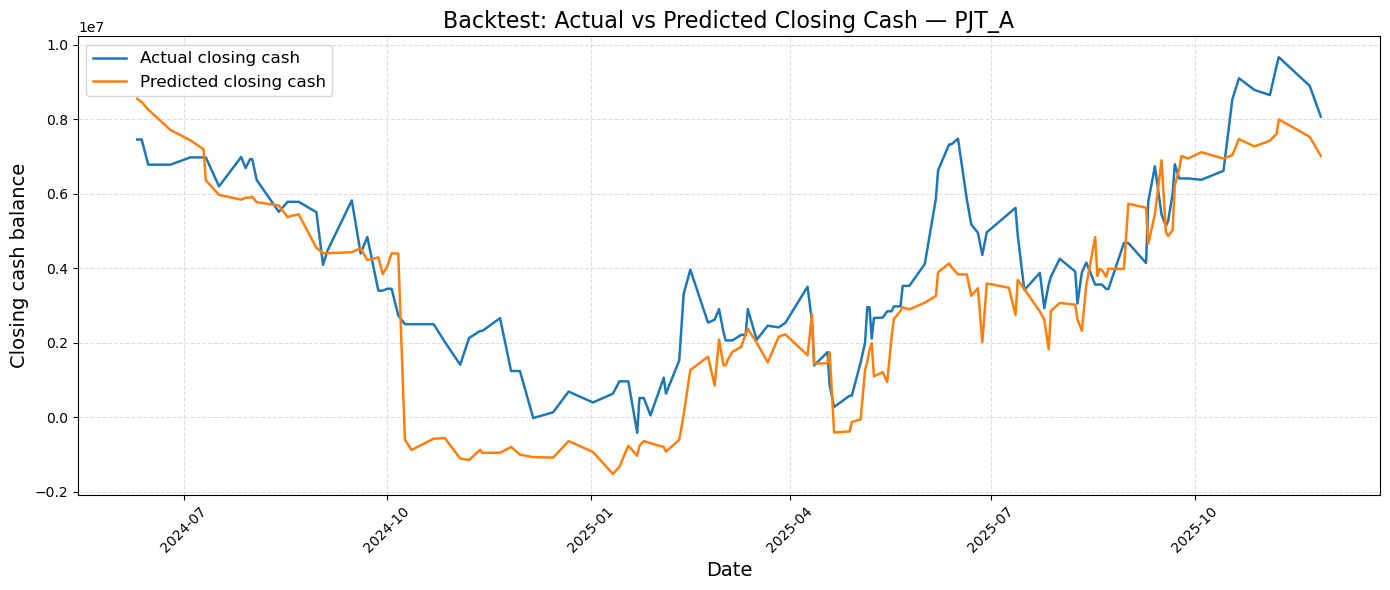


=== Backtesting Closing Cash for PJT_B ===


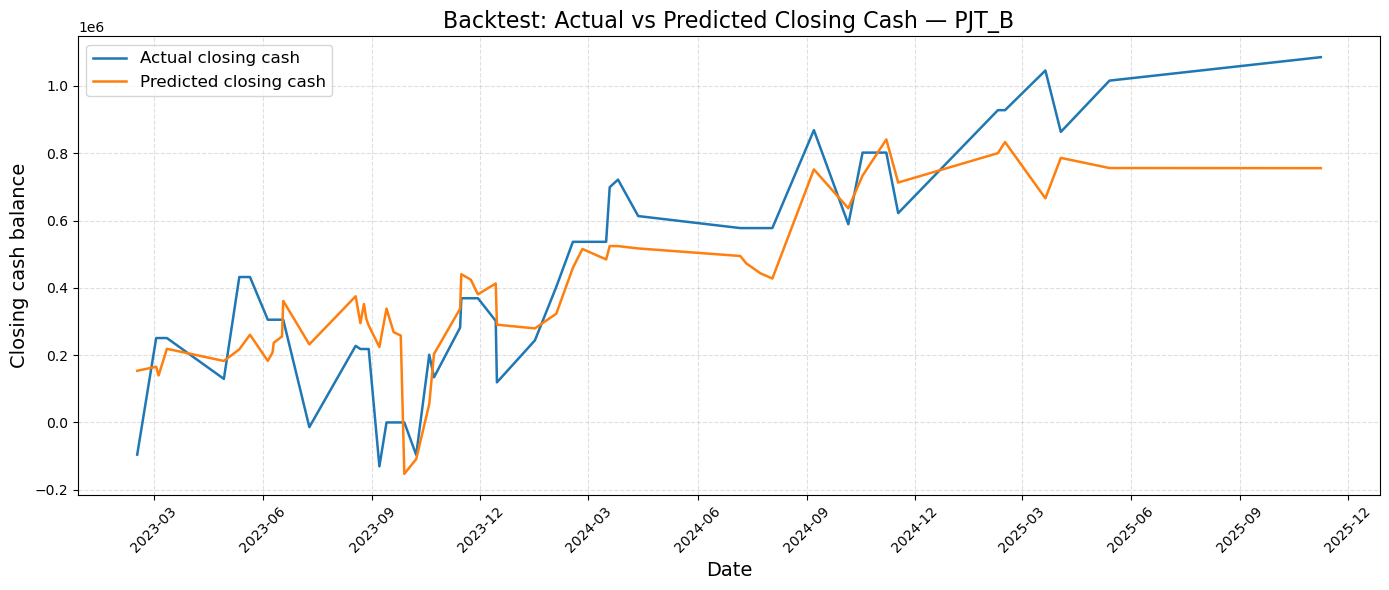


=== Backtesting Closing Cash for PJT_C ===


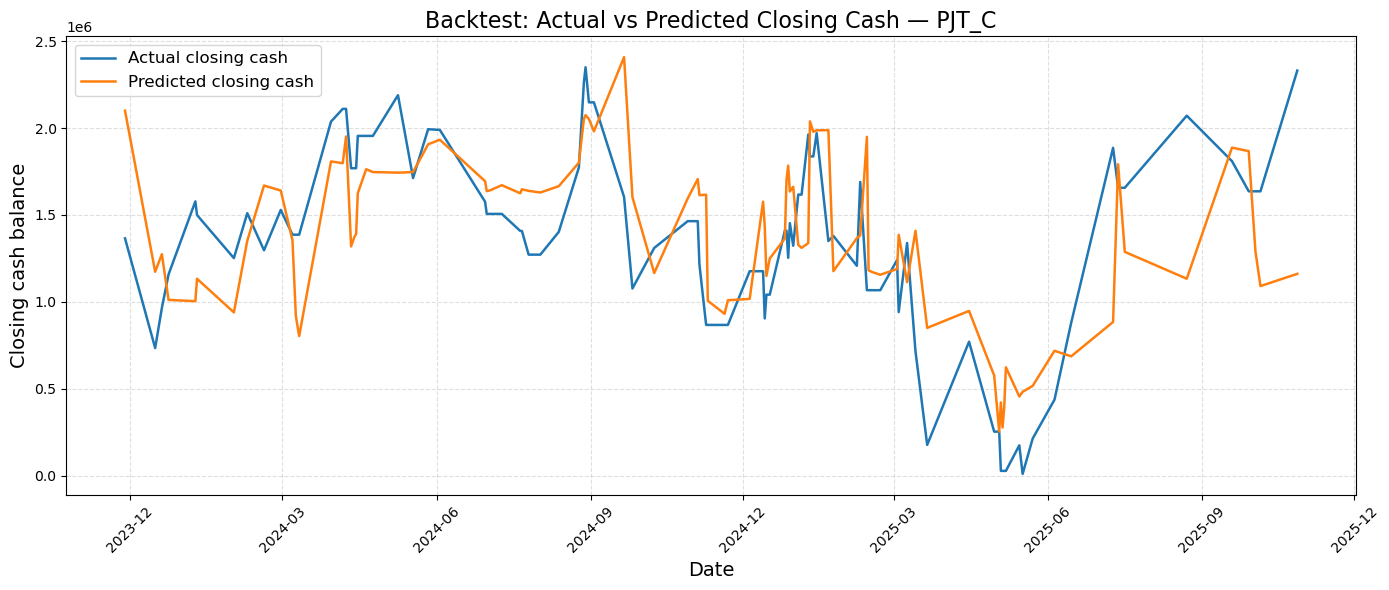

Columns in all_projects_df: ['Project', 'Model', 'Mean R2', 'Mean RMSE', 'Mean MAE']
Metric column mapping: {'R2': 'Mean R2', 'RMSE': 'Mean RMSE', 'MAE': 'Mean MAE'}


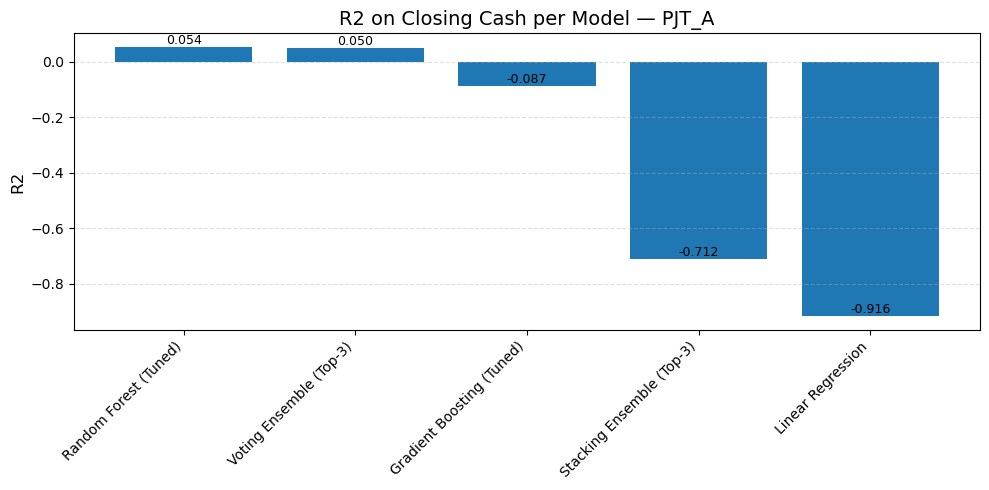

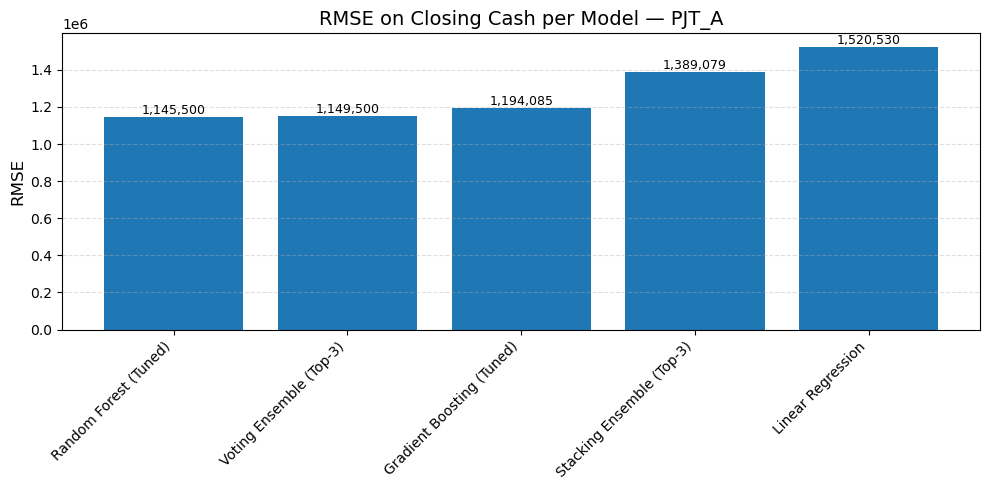

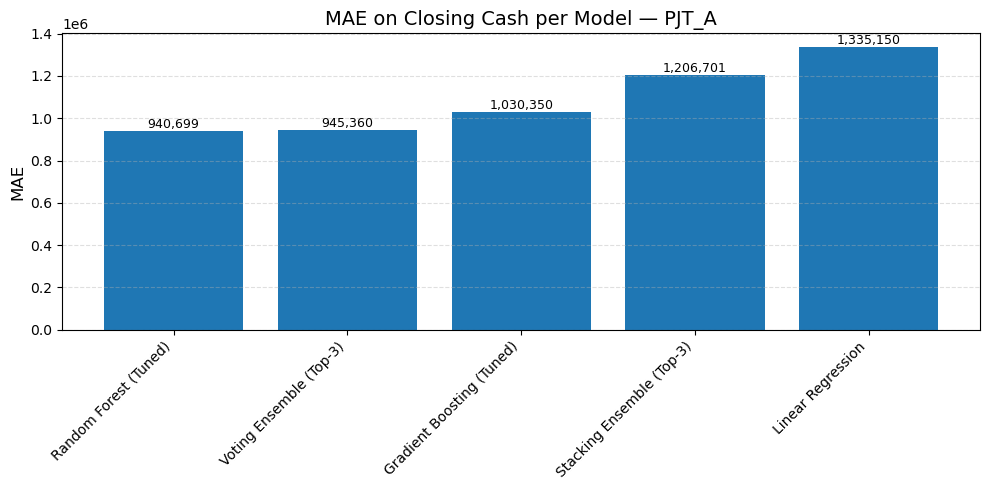

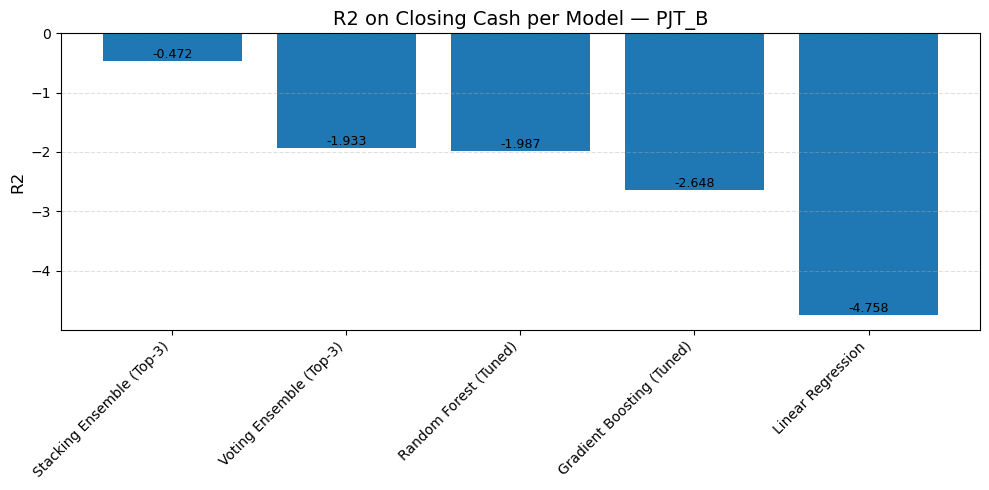

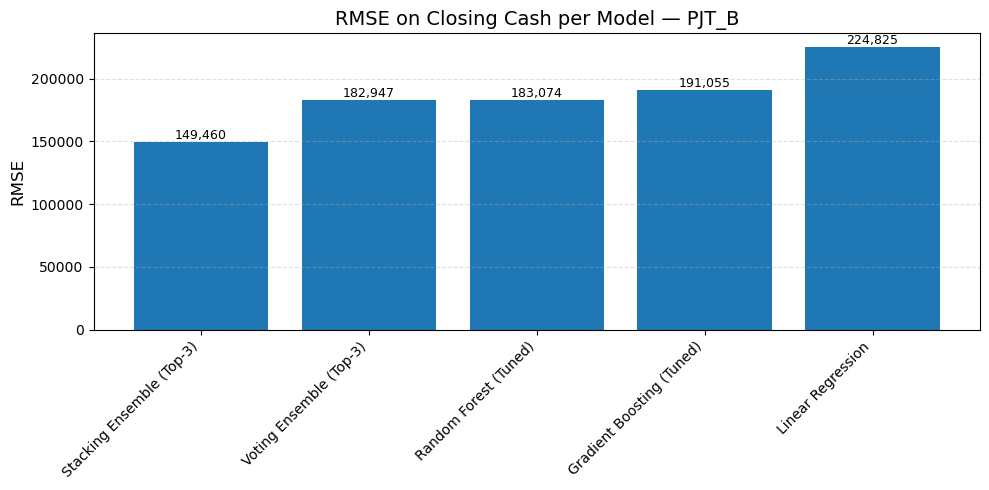

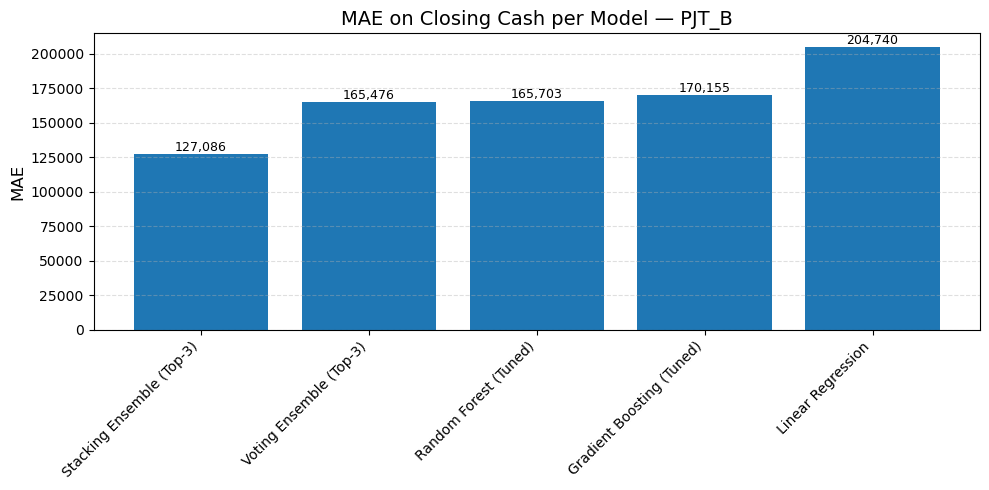

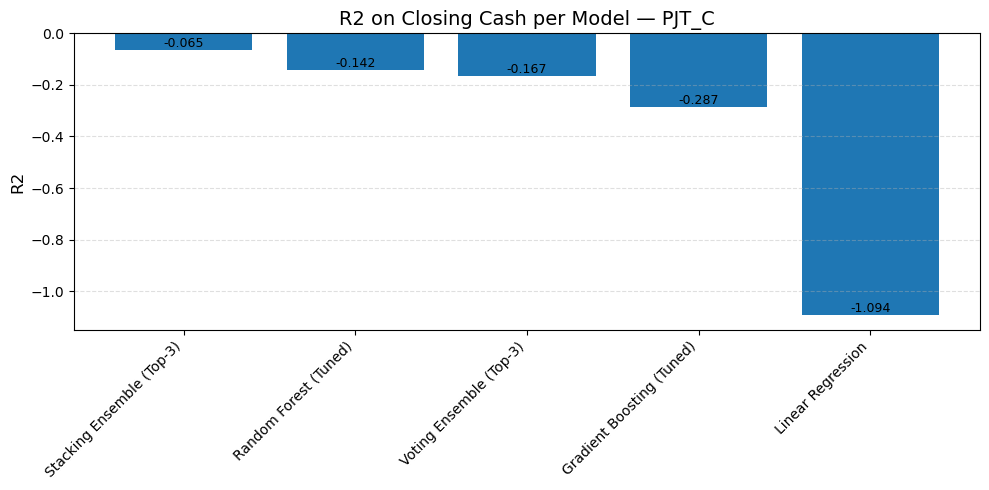

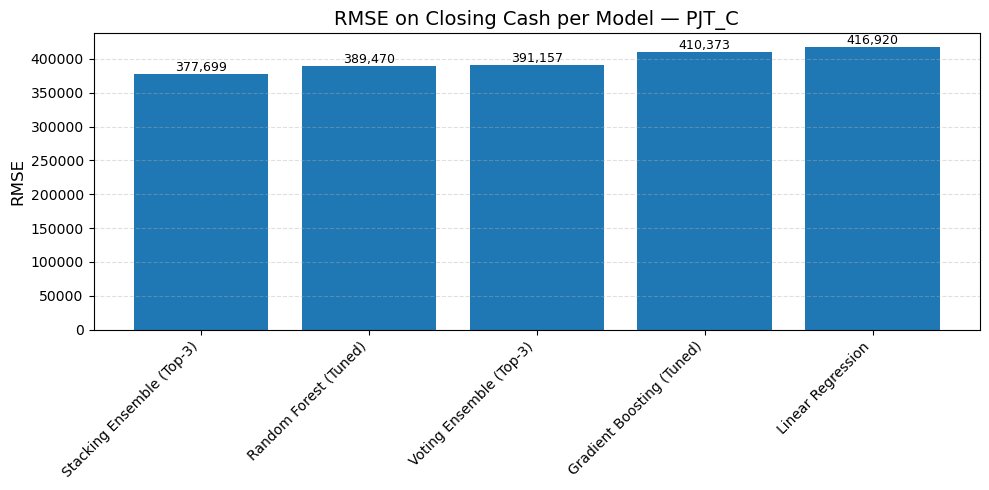

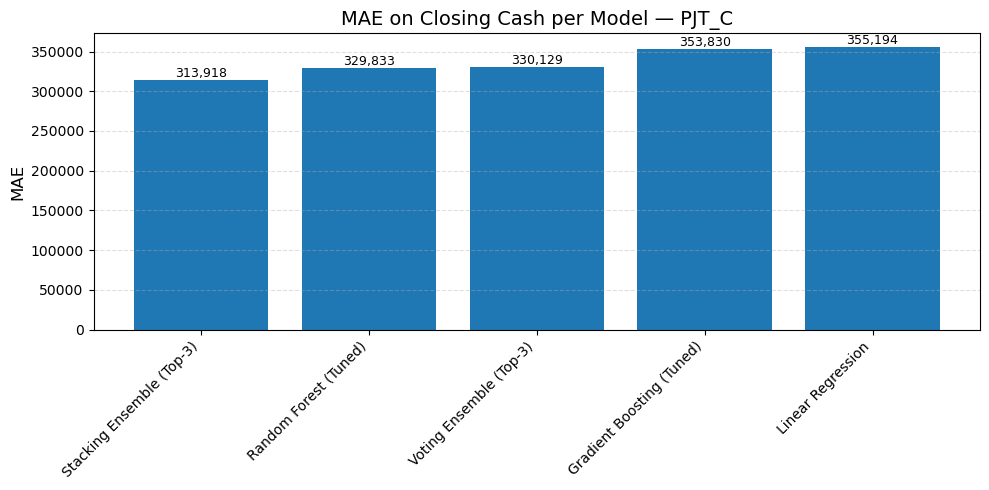


 CCC Time Series for PJT_A


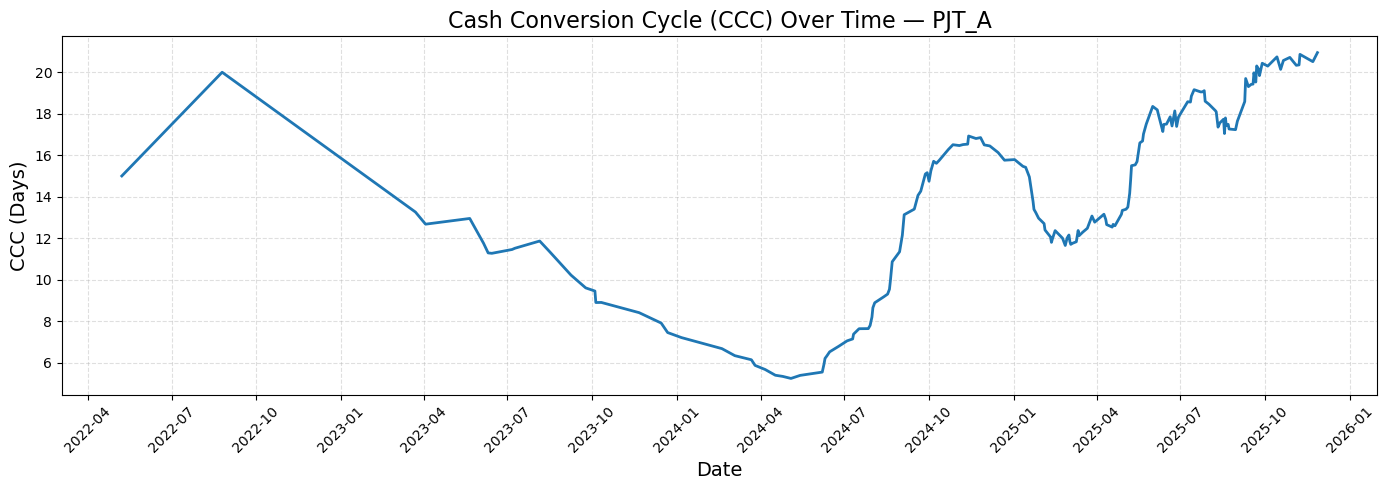


 CCC Time Series for PJT_B


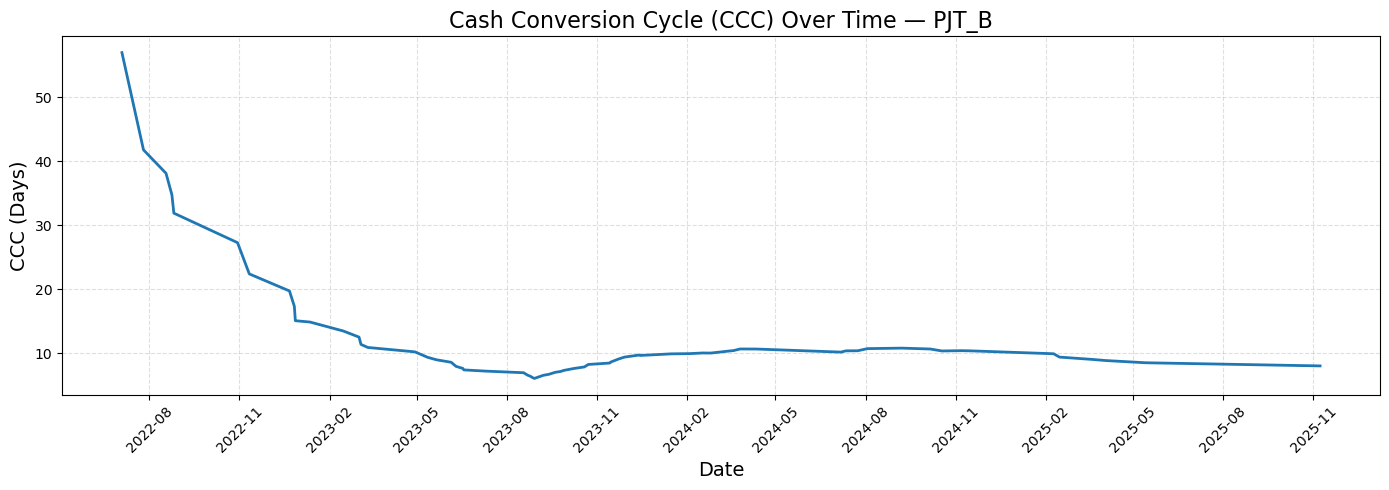


 CCC Time Series for PJT_C


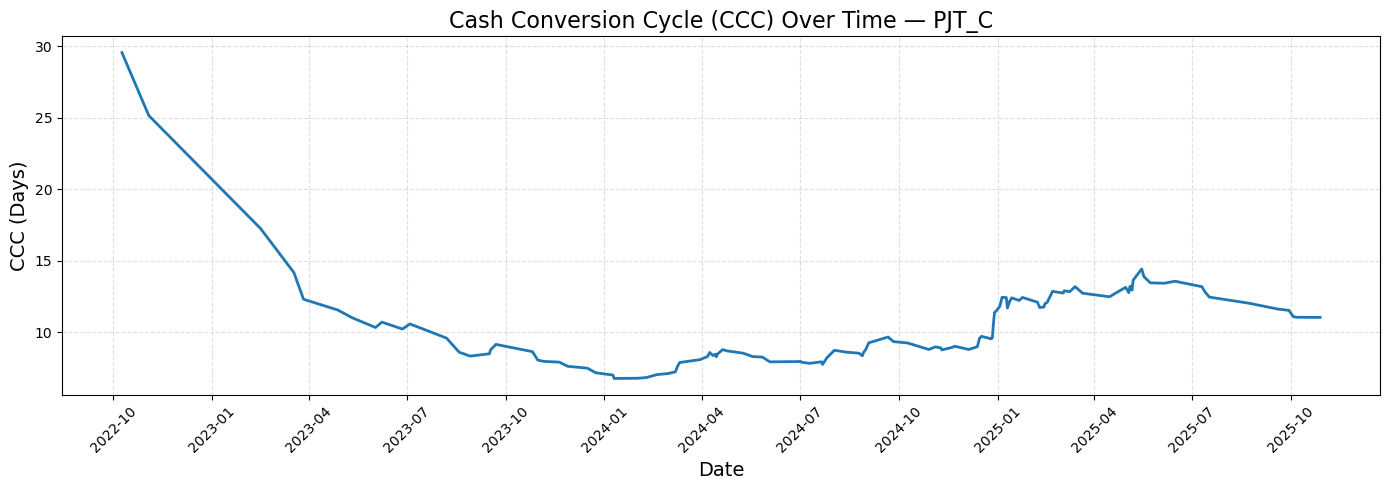


 CCC vs Volatility for PJT_A


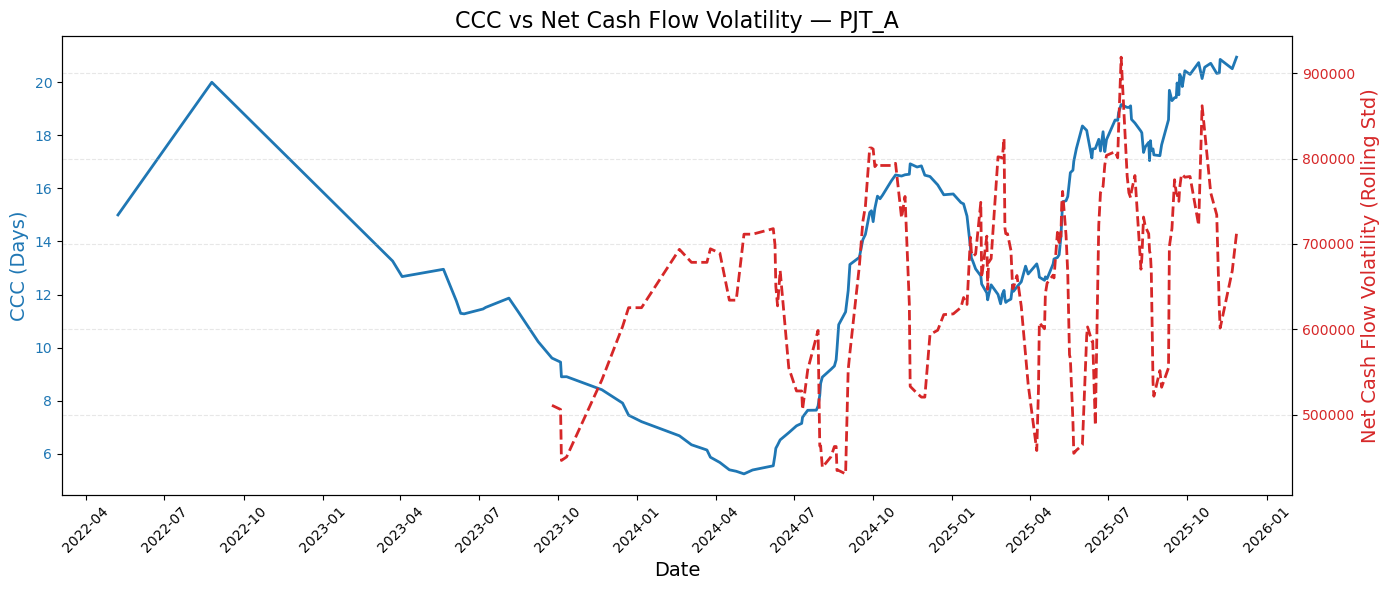


 CCC vs Volatility for PJT_B


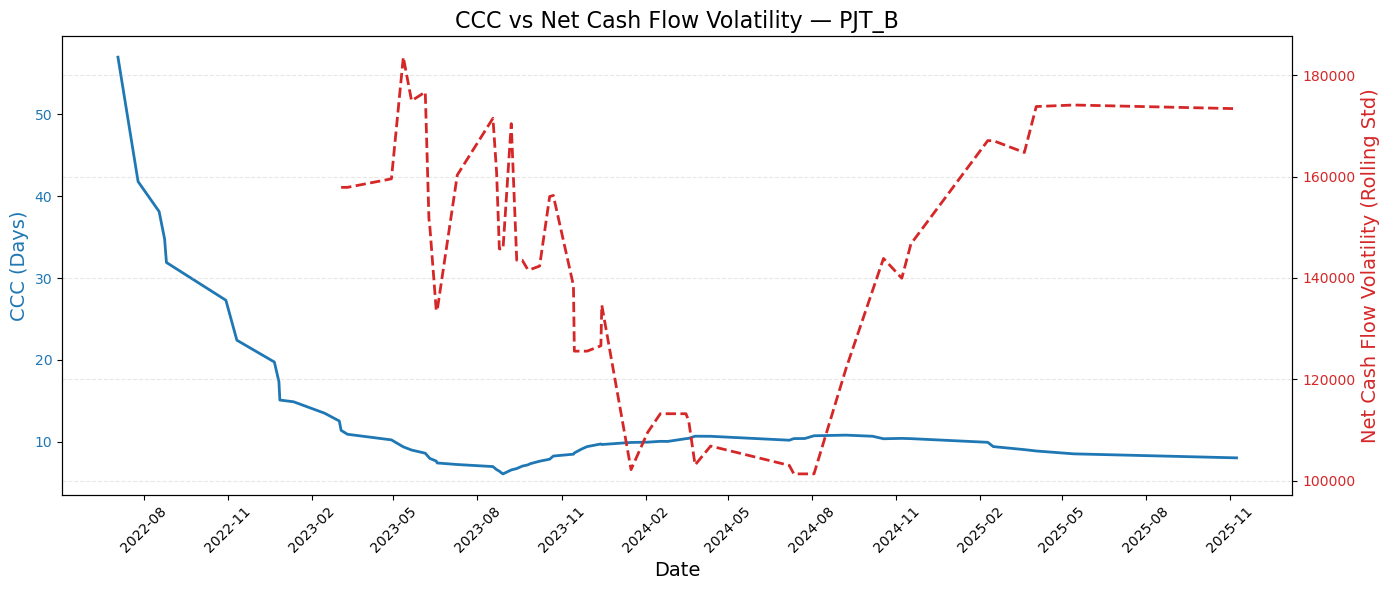


 CCC vs Volatility for PJT_C


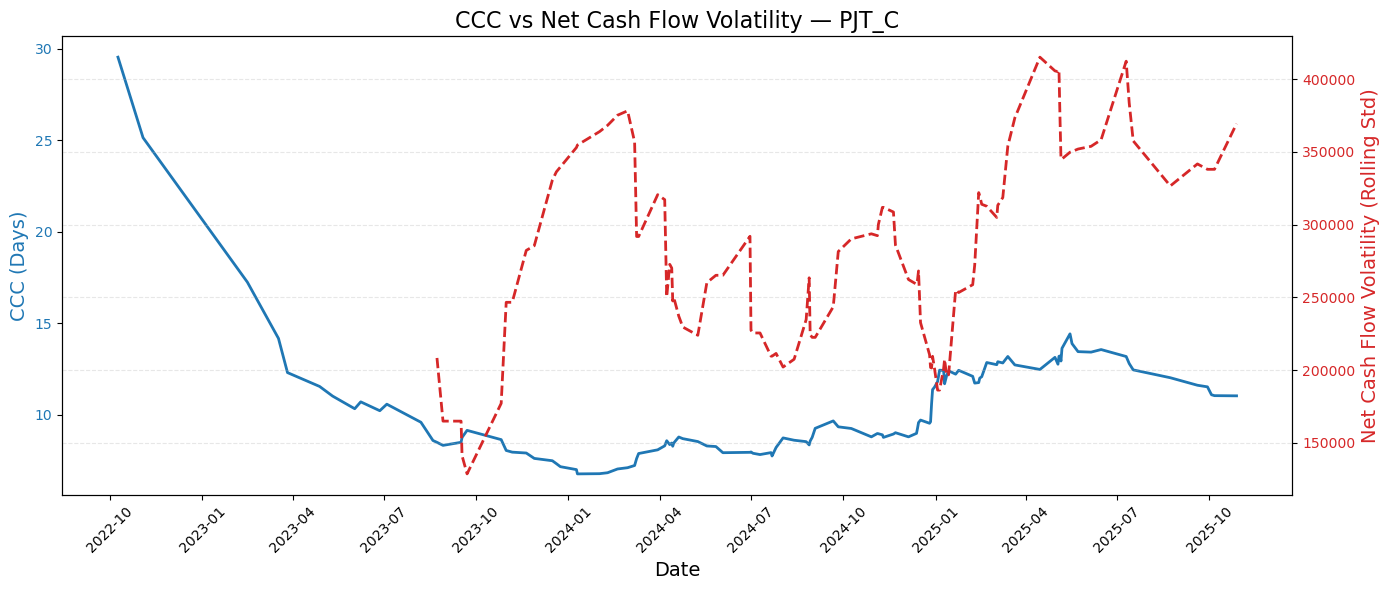

In [27]:
# ====================================
# 9. Backtests & Working Capital Plots
# ====================================

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# ---------------------------------------
# 9a. Backtest: Actual vs Predicted Closing Cash
# ---------------------------------------

def backtest_project_closing_cash(df_feat, project_id, model_name=BEST_MODEL_NAME_V3, n_splits=5):
    df_proj = df_feat[df_feat["project_id"] == project_id].copy()
    df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    df_proj = df_proj.dropna(subset=V3_FEATURE_COLS + [TARGET_COL]).reset_index(drop=True)

    X = df_proj[V3_FEATURE_COLS].values
    y = df_proj[TARGET_COL].values  # closing_cash_balance
    dates = df_proj["date"].values

    tscv = TimeSeriesSplit(n_splits=n_splits)

    preds, actuals, pred_dates = [], [], []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        test_dates = dates[test_idx]

        model = create_best_model_instance(model_name)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        preds.extend(y_pred)
        actuals.extend(y_test)
        pred_dates.extend(test_dates)

    df_bt = pd.DataFrame({
        "date": pred_dates,
        "actual": actuals,
        "predicted": preds
    }).sort_values("date")

    return df_bt


def plot_backtest_closing_cash(df_bt, project_id):
    plt.figure(figsize=(14, 6))
    plt.plot(df_bt["date"], df_bt["actual"], label="Actual closing cash", linewidth=1.8)
    plt.plot(df_bt["date"], df_bt["predicted"], label="Predicted closing cash", linewidth=1.8)

    plt.title(f"Backtest: Actual vs Predicted Closing Cash — {project_id}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Closing cash balance", fontsize=14)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


for pid in project_ids_feat:
    print(f"\n=== Backtesting Closing Cash for {pid} ===")
    df_bt = backtest_project_closing_cash(df_feat, pid)
    plot_backtest_closing_cash(df_bt, pid)

# ---------------------------------------
# 9b. Per-Project Model Performance Bar Charts (unchanged structure)
# ---------------------------------------

perf_df = all_projects_df.copy()
print("Columns in all_projects_df:", perf_df.columns.tolist())

projects = perf_df["Project"].unique()

def find_col(possible_names):
    for name in possible_names:
        if name in perf_df.columns:
            return name
    return None

col_r2  = find_col(["R2", "Mean R2", "Mean_R2", "Mean R²"])
col_rmse = find_col(["RMSE", "Mean RMSE", "Mean_RMSE"])
col_mae  = find_col(["MAE", "Mean MAE", "Mean_MAE"])

metric_map = {
    "R2": col_r2,
    "RMSE": col_rmse,
    "MAE": col_mae,
}

print("Metric column mapping:", metric_map)

for pid in projects:
    df_p = perf_df[perf_df["Project"] == pid]

    for metric_label, col_name in metric_map.items():
        if col_name is None:
            print(f"Skipping {metric_label}: no matching column found.")
            continue

        plt.figure(figsize=(10, 5))

        ascending = (metric_label != "R2")
        df_sorted = df_p.sort_values(col_name, ascending=ascending)

        bars = plt.bar(df_sorted["Model"], df_sorted[col_name])

        plt.title(f"{metric_label} on Closing Cash per Model — {pid}", fontsize=14)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.ylabel(metric_label, fontsize=12)
        plt.grid(axis="y", linestyle="--", alpha=0.4)

        for bar in bars:
            value = bar.get_height()
            if metric_label == "R2":
                text = f"{value:.3f}"
            else:
                text = f"{value:,.0f}"
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                value,
                text,
                ha="center",
                va="bottom",
                fontsize=9
            )

        plt.tight_layout()
        plt.show()

# ---------------------------------------
# 9c. Cash Conversion Cycle (CCC) Time-Series Plot
# ---------------------------------------

def plot_ccc_for_project(df_feat, project_id):
    df_proj = df_feat[df_feat["project_id"] == project_id].copy()
    df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

    df_proj["CCC"] = (
        df_proj["dsu_days_sales_uncollected"] +
        df_proj["dpo_days_payables_outstanding"]
    )

    plt.figure(figsize=(14, 5))
    plt.plot(df_proj["date"], df_proj["CCC"], label="CCC (DSU + DPO)", linewidth=2)

    plt.title(f"Cash Conversion Cycle (CCC) Over Time — {project_id}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("CCC (Days)", fontsize=14)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

for pid in project_ids_feat:
    print(f"\n CCC Time Series for {pid}")
    plot_ccc_for_project(df_feat, pid)

# ---------------------------------------
# 9d. CCC vs Net Cash Flow Volatility Overlay
# ---------------------------------------

def plot_ccc_vs_volatility(df_feat, project_id, window=14):
    df_proj = df_feat[df_feat["project_id"] == project_id].copy()
    df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
    df_proj = df_proj.dropna(subset=["date"]).sort_values("date").reset_index(drop=True)

    df_proj["CCC"] = (
        df_proj["dsu_days_sales_uncollected"] +
        df_proj["dpo_days_payables_outstanding"]
    )

    df_proj["volatility"] = df_proj["net_cash_flow"].rolling(window=window).std()

    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_xlabel("Date", fontsize=14)
    ax1.set_ylabel("CCC (Days)", fontsize=14, color="tab:blue")
    ax1.plot(df_proj["date"], df_proj["CCC"], color="tab:blue", label="CCC", linewidth=2)
    ax1.tick_params(axis='y', labelcolor="tab:blue")

    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)

    ax2 = ax1.twinx()
    ax2.set_ylabel("Net Cash Flow Volatility (Rolling Std)", fontsize=14, color="tab:red")
    ax2.plot(df_proj["date"], df_proj["volatility"], color="tab:red", linestyle="--",
             label="Cash Flow Volatility", linewidth=2)
    ax2.tick_params(axis='y', labelcolor="tab:red")

    plt.title(f"CCC vs Net Cash Flow Volatility — {project_id}", fontsize=16)
    fig.tight_layout()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

for pid in project_ids_feat:
    print(f"\n CCC vs Volatility for {pid}")
    plot_ccc_vs_volatility(df_feat, pid)


In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_dsu_dpo_ocf_timeseries(df_feat, project_ids):
    ratio_map = {
        "dsu_days_sales_uncollected": "DSU (Days Sales Uncollected)",
        "dpo_days_payables_outstanding": "DPO (Days Payables Outstanding)",
        "ocf_ratio": "OCF Ratio",
    }

    for pid in project_ids:
        df_proj = df_feat[df_feat["project_id"] == pid].copy()
        df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
        df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

        plt.figure(figsize=(14, 6))
        for col, label in ratio_map.items():
            plt.plot(df_proj["date"], df_proj[col], label=label, linewidth=2)

        plt.title(f"DSU / DPO / OCF Over Time — {pid}", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Value", fontsize=14)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        plt.xticks(rotation=45, fontsize=10)

        plt.grid(True, linestyle="--", alpha=0.4)
        plt.legend(title="Ratios", fontsize=11)
        plt.tight_layout()
        plt.show()


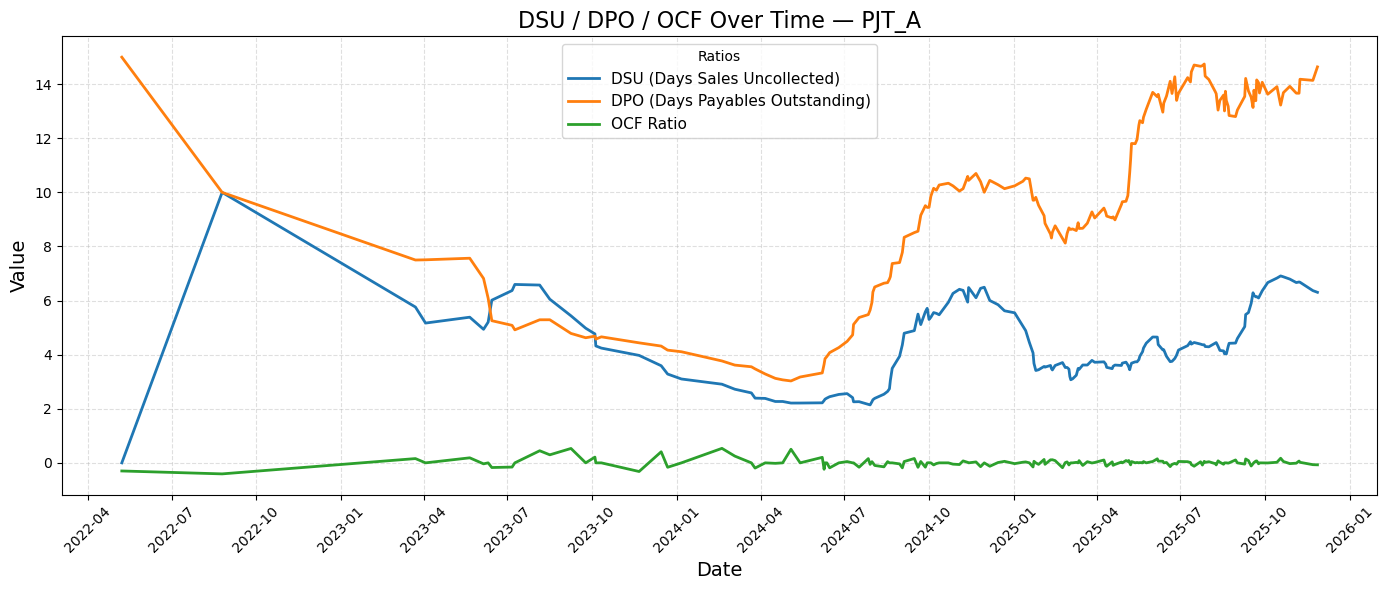

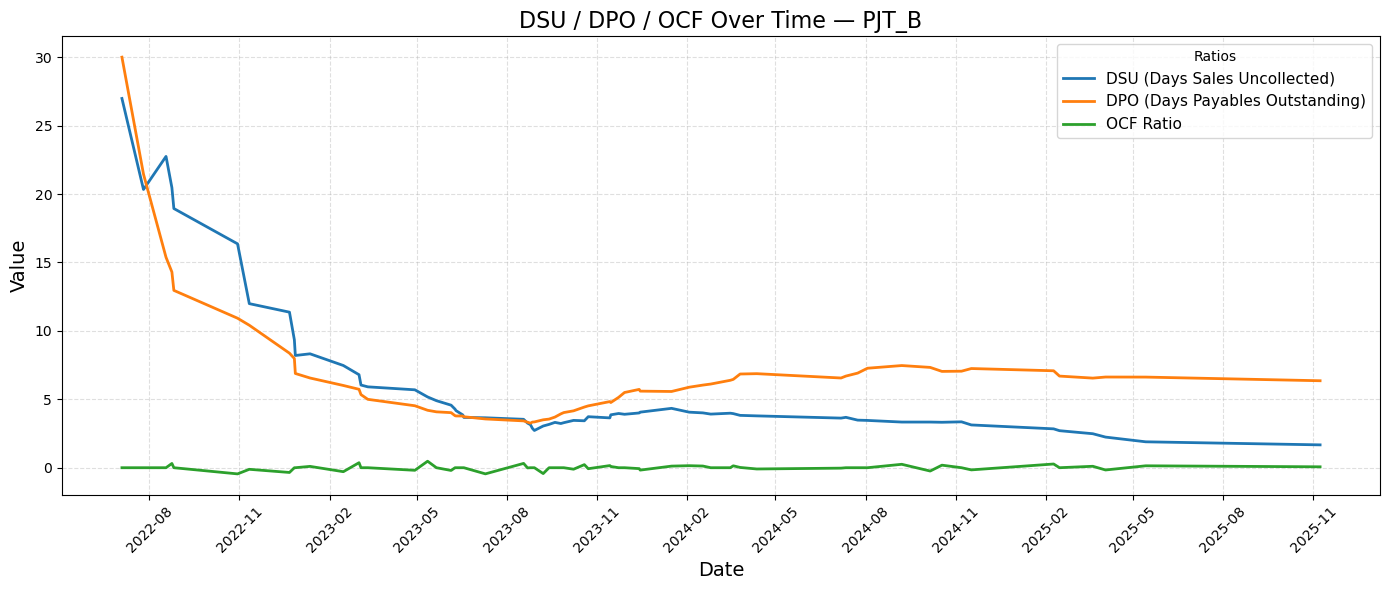

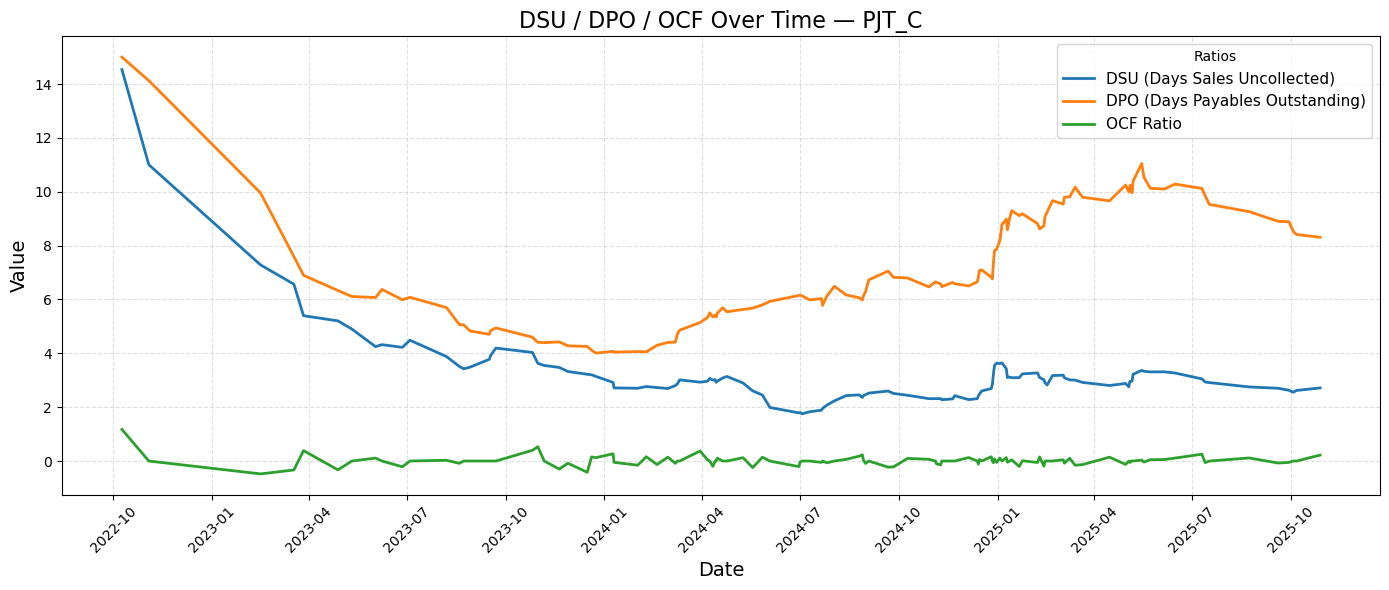

In [33]:
plot_dsu_dpo_ocf_timeseries(df_feat, ["PJT_A", "PJT_B", "PJT_C"])

In [34]:
def plot_net_cashflow_with_forecasts(df_feat, forecast_df, project_ids):
    df_feat = df_feat.copy()
    df_feat["date"] = pd.to_datetime(df_feat["date"], errors="coerce")

    # marker config per horizon
    horizon_settings = [
        (1,  "1-day forecast (net CF)",  "o"),
        (7,  "7-day forecast (net CF)",  "s"),
        (30, "30-day forecast (net CF)", "^"),
    ]

    for pid in project_ids:
        df_proj = df_feat[df_feat["project_id"] == pid].copy()
        df_proj = df_proj.dropna(subset=["date"]).sort_values("date")
        if df_proj.empty:
            continue

        last_date_for_plot = df_proj["date"].max()
        f_proj = forecast_df[forecast_df["Project"] == pid].copy()

        plt.figure(figsize=(14, 6))

        # Actual net cash flow
        plt.plot(
            df_proj["date"],
            df_proj["net_cash_flow"],
            label="Actual net cash flow",
            linewidth=1.8,
        )

        # Horizon markers at last observed date
        for h, label, marker in horizon_settings:
            sub = f_proj[f_proj["Horizon_Days"] == h]
            if not sub.empty:
                value = sub["Forecasted_Future_Net_Cash_Flow"].iloc[0]
                plt.scatter(
                    last_date_for_plot,
                    value,
                    marker=marker,
                    s=140,
                    label=label,
                    edgecolor="black",
                    linewidth=0.7,
                )

        plt.title(f"Net Cash Flow and Multi-Horizon Forecasts — {pid}", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Net cash flow", fontsize=14)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        plt.xticks(rotation=45, fontsize=10)

        plt.grid(True, linestyle="--", alpha=0.4)
        plt.legend(fontsize=11)
        plt.tight_layout()
        plt.show()


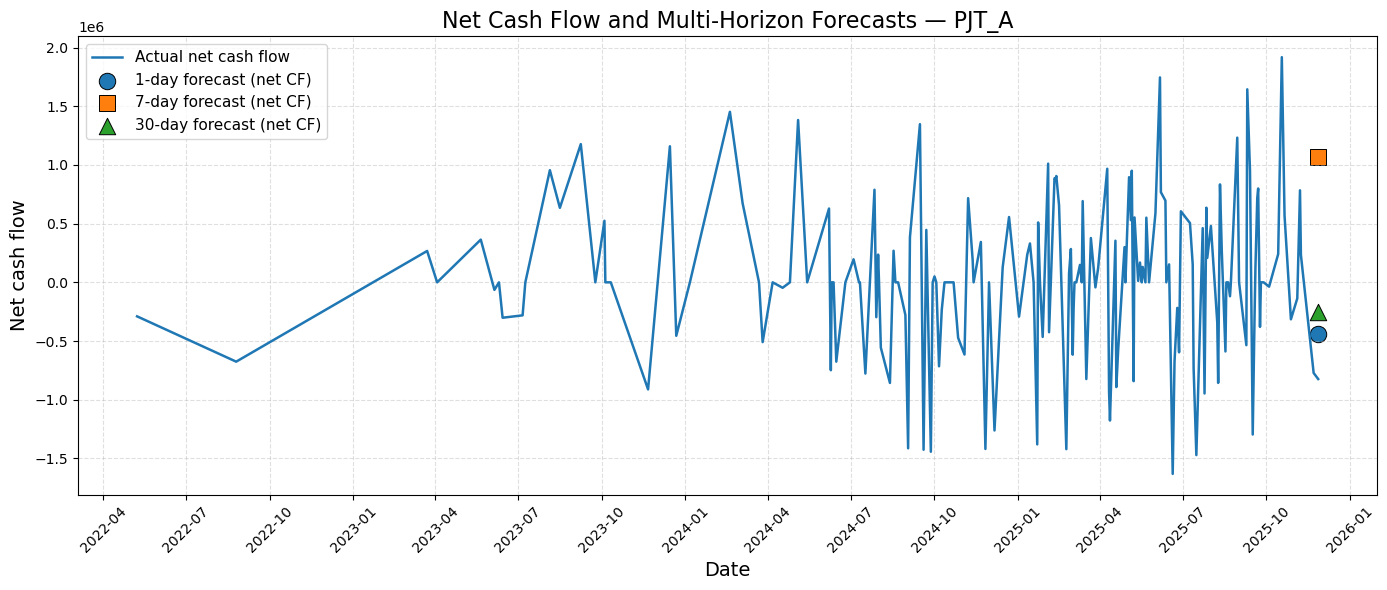

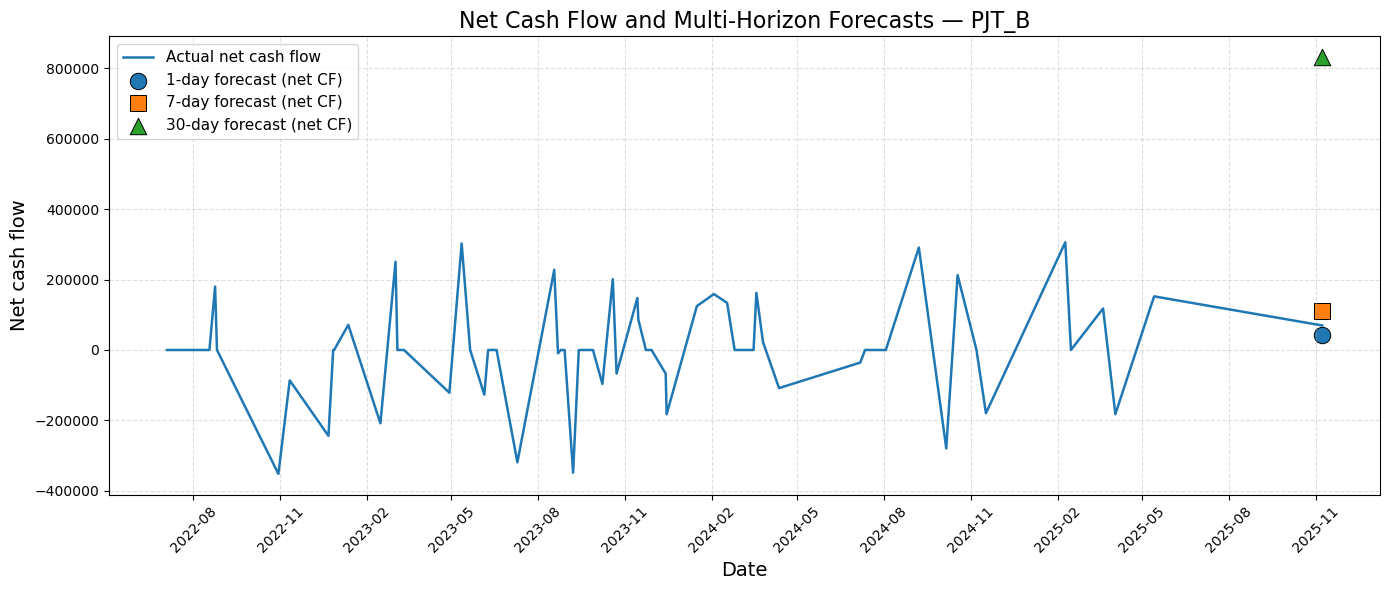

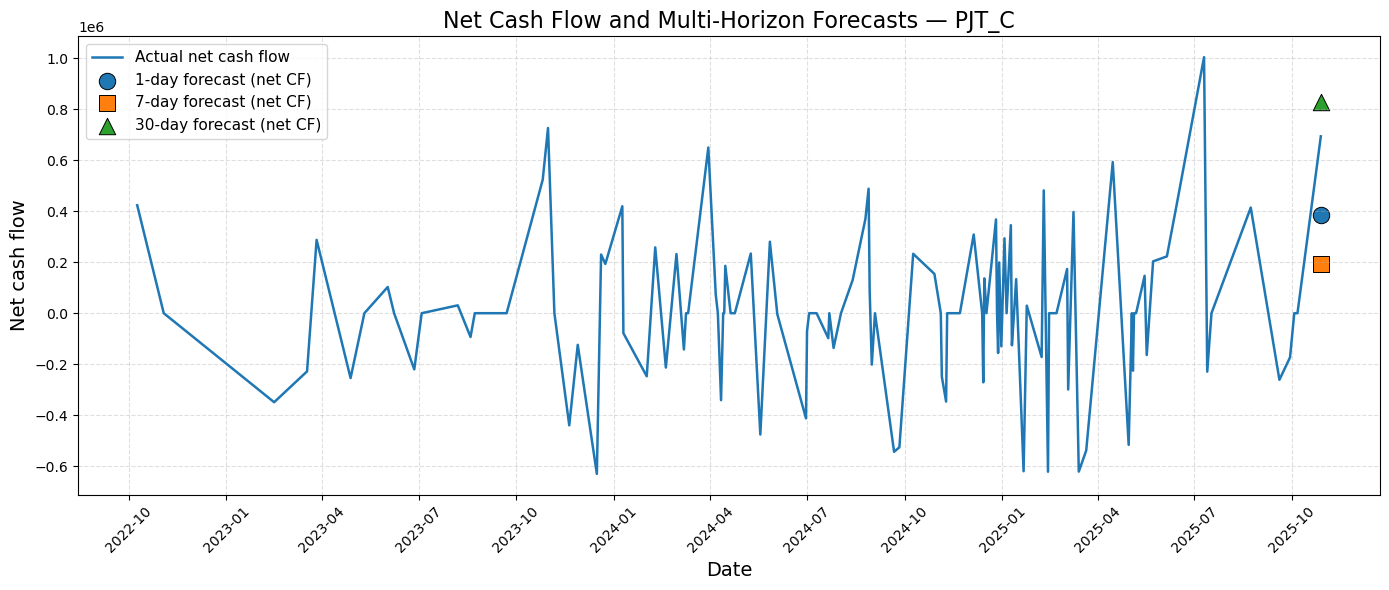

In [36]:
plot_net_cashflow_with_forecasts(df_feat, forecast_df, ["PJT_A", "PJT_B", "PJT_C"])


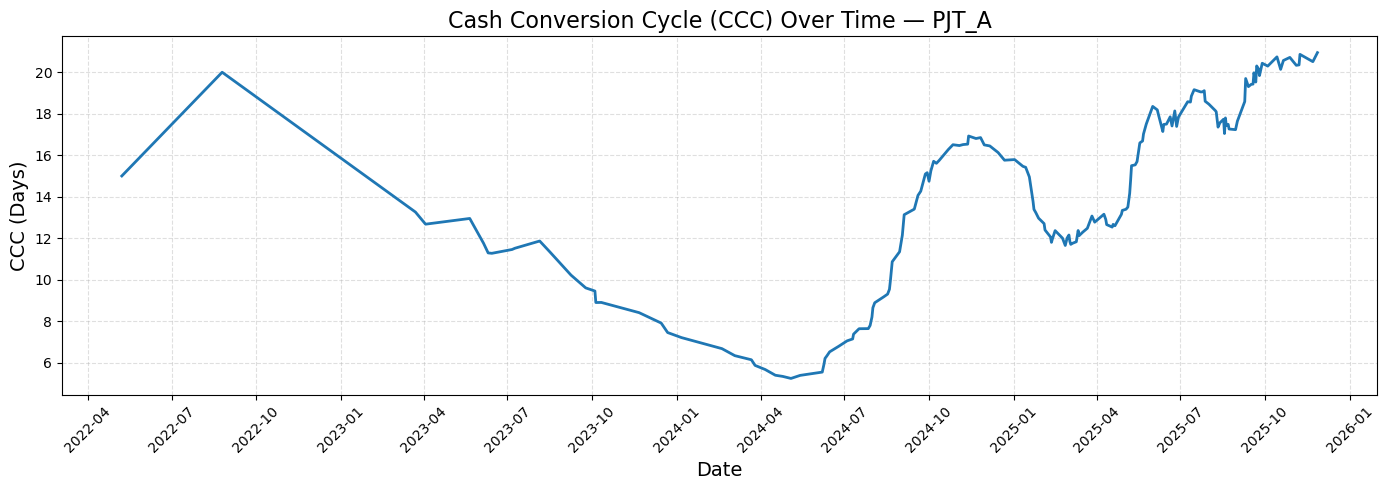

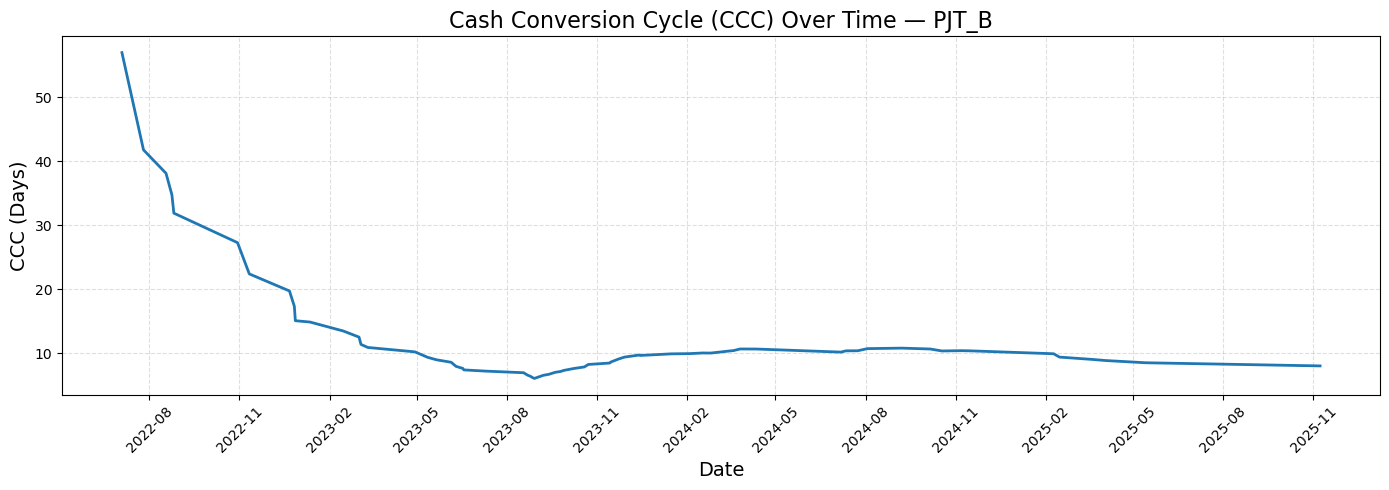

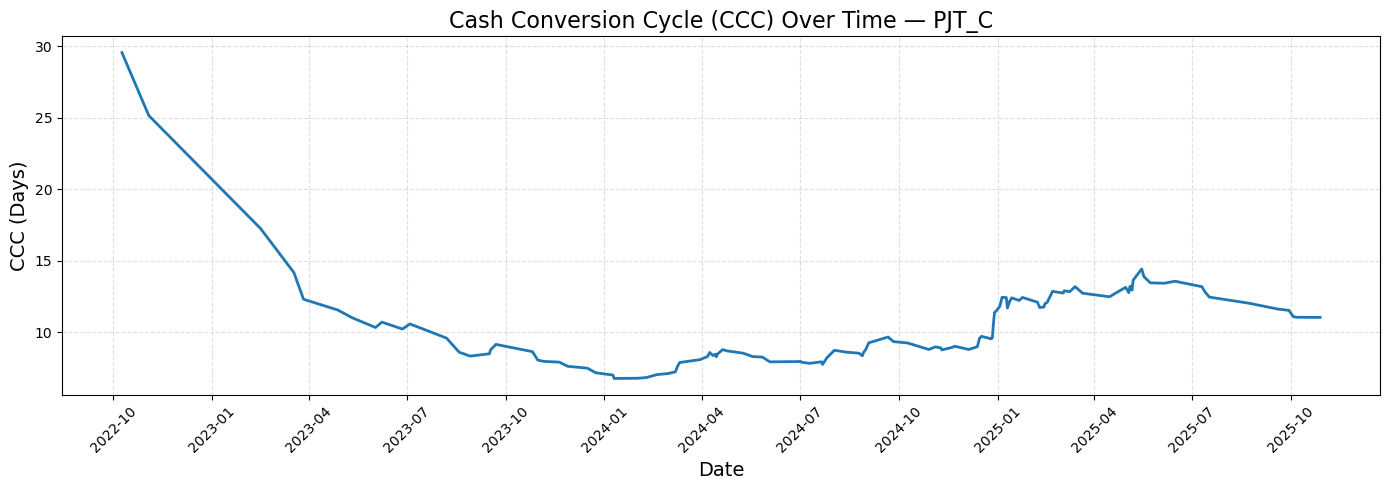

In [38]:
def plot_ccc_timeseries(df_feat, project_ids):
    for pid in project_ids:
        df_proj = df_feat[df_feat["project_id"] == pid].copy()
        df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
        df_proj = df_proj.dropna(subset=["date"]).sort_values("date")

        # Cash Conversion Cycle proxy
        df_proj["CCC"] = (
            df_proj["dsu_days_sales_uncollected"]
            + df_proj["dpo_days_payables_outstanding"]
        )

        plt.figure(figsize=(14, 5))
        plt.plot(df_proj["date"], df_proj["CCC"], label="CCC (DSU + DPO)", linewidth=2)

        plt.title(f"Cash Conversion Cycle (CCC) Over Time — {pid}", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("CCC (Days)", fontsize=14)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        plt.xticks(rotation=45)

        plt.grid(True, linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()

plot_ccc_timeseries(df_feat, ["PJT_A", "PJT_B", "PJT_C"])

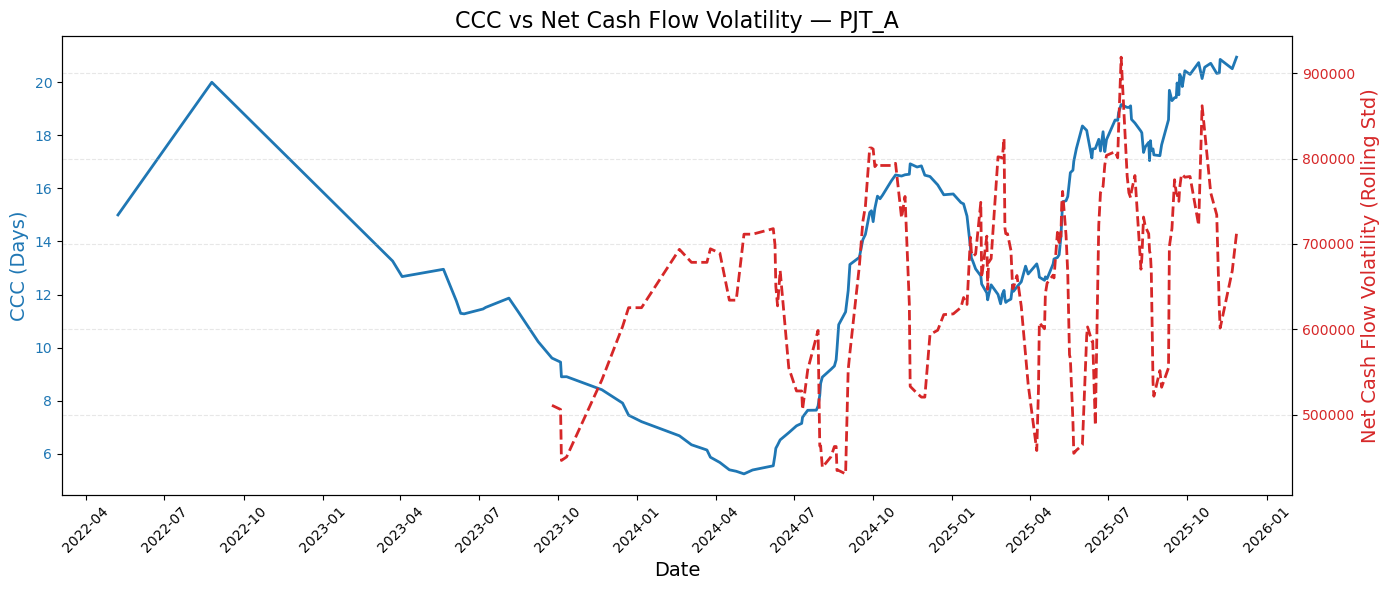

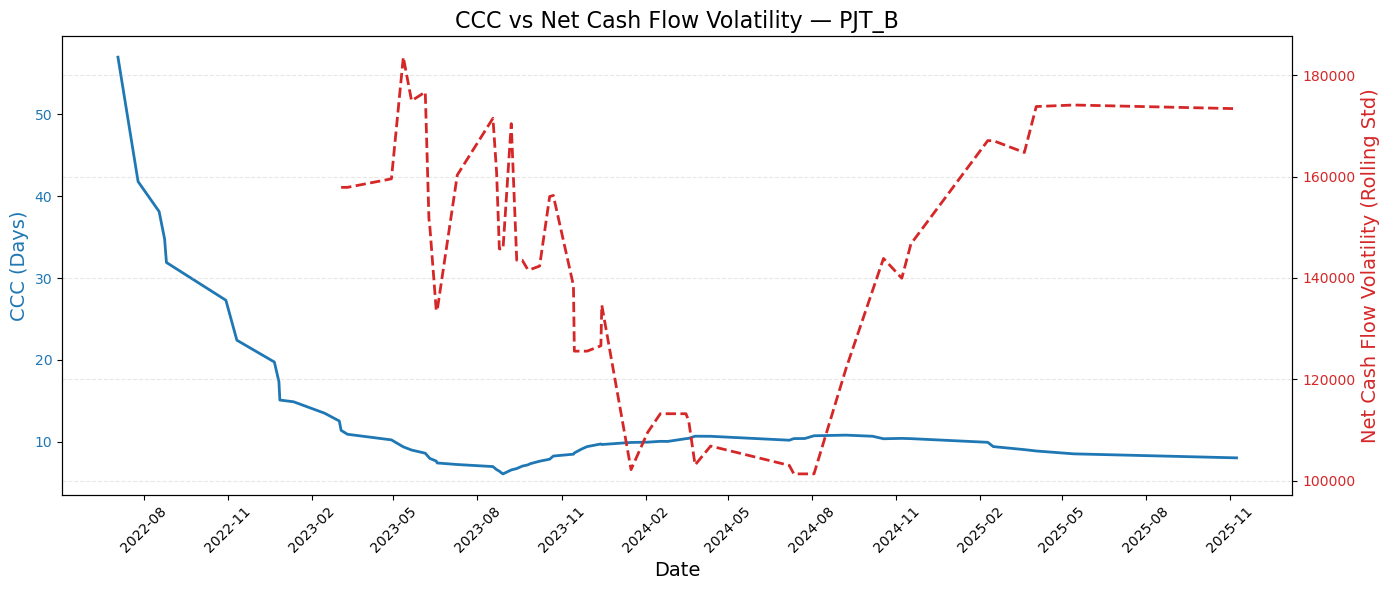

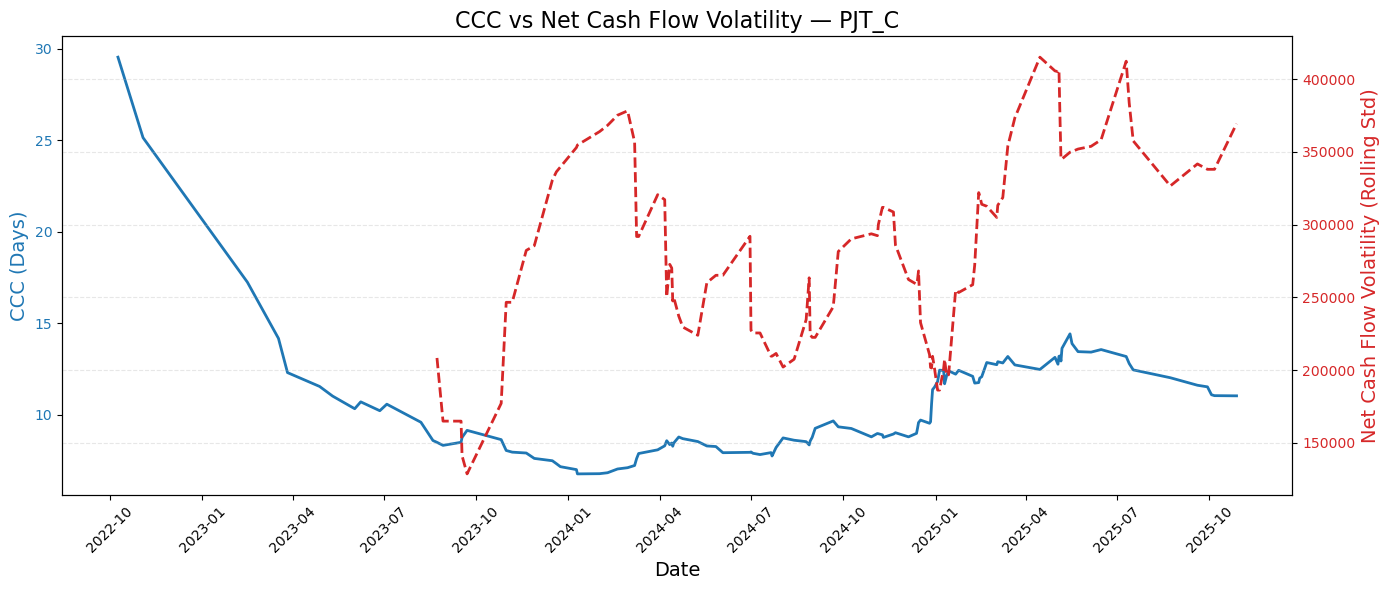

In [40]:
def plot_ccc_vs_volatility(df_feat, project_ids, window=14):
    """
    window: rolling window (in days) for volatility of net_cash_flow
    """
    for pid in project_ids:
        df_proj = df_feat[df_feat["project_id"] == pid].copy()
        df_proj["date"] = pd.to_datetime(df_proj["date"], errors="coerce")
        df_proj = df_proj.dropna(subset=["date"]).sort_values("date").reset_index(drop=True)

        df_proj["CCC"] = (
            df_proj["dsu_days_sales_uncollected"]
            + df_proj["dpo_days_payables_outstanding"]
        )

        df_proj["volatility"] = df_proj["net_cash_flow"].rolling(window=window).std()

        fig, ax1 = plt.subplots(figsize=(14, 6))

        ax1.set_xlabel("Date", fontsize=14)
        ax1.set_ylabel("CCC (Days)", fontsize=14, color="tab:blue")
        ax1.plot(df_proj["date"], df_proj["CCC"], color="tab:blue",
                 label="CCC", linewidth=2)
        ax1.tick_params(axis="y", labelcolor="tab:blue")

        ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        plt.xticks(rotation=45)

        ax2 = ax1.twinx()
        ax2.set_ylabel("Net Cash Flow Volatility (Rolling Std)",
                       fontsize=14, color="tab:red")
        ax2.plot(df_proj["date"], df_proj["volatility"],
                 color="tab:red", linestyle="--",
                 label="Cash Flow Volatility", linewidth=2)
        ax2.tick_params(axis="y", labelcolor="tab:red")

        plt.title(f"CCC vs Net Cash Flow Volatility — {pid}", fontsize=16)
        fig.tight_layout()
        plt.grid(True, linestyle="--", alpha=0.3)
        plt.show()

plot_ccc_vs_volatility(df_feat, ["PJT_A", "PJT_B", "PJT_C"], window=14)